# Problem Statement

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
wine = pd.read_csv("wine.csv")
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# Data Exploration

In [3]:
wine.shape

(178, 14)

In [4]:
wine.size

2492

In [5]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine.isnull()

Type  Alcohol  Malic    Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    False    False  False  False       False      False    False       False   
1    False    False  False  False       False      False    False       False   
2    False    False  False  False       False      False    False       False   
3    False    False  False  False       False      False    False       False   
4    False    False  False  False       False      False    False       False   
..     ...      ...    ...    ...         ...        ...      ...         ...   
173  False    False  False  False       False      False    False       False   
174  False    False  False  False       False      False    False       False   
175  False    False  False  False       False      False    False       False   
176  False    False  False  False       False      False    False       False   
177  False    False  False  False       False      False    False       False   

     Nonflavanoids  Proanthocyanins  Color    Hue  Dilution  Proline  
0            False            False  False  False     False    False  
1            False            False  False  False     False    False  
2            False            False  False  False     False    False  
3            False            False  False  False     False    False  
4            False            False  False  False     False    False  
..             ...              ...    ...    ...       ...      ...  
173          False            False  False  False     False    False  
174          False            False  False  False     False    False  
175          False            False  False  False     False    False  
176          False            False  False  False     False    False  
177          False            False  False  False     False    False  

[178 rows x 14 columns]

In [8]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

There are no null values.

In [9]:
wine.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [10]:
wine.duplicated().sum()

0

In [11]:
wine['Type'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

This are classifers. Our aim is to form this clusters. So we will drop this column as it will affect our analysis.

In [13]:
data = wine.copy()
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [14]:
data = data.drop('Type', axis=1)
data.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# Exploratory Data Analytics

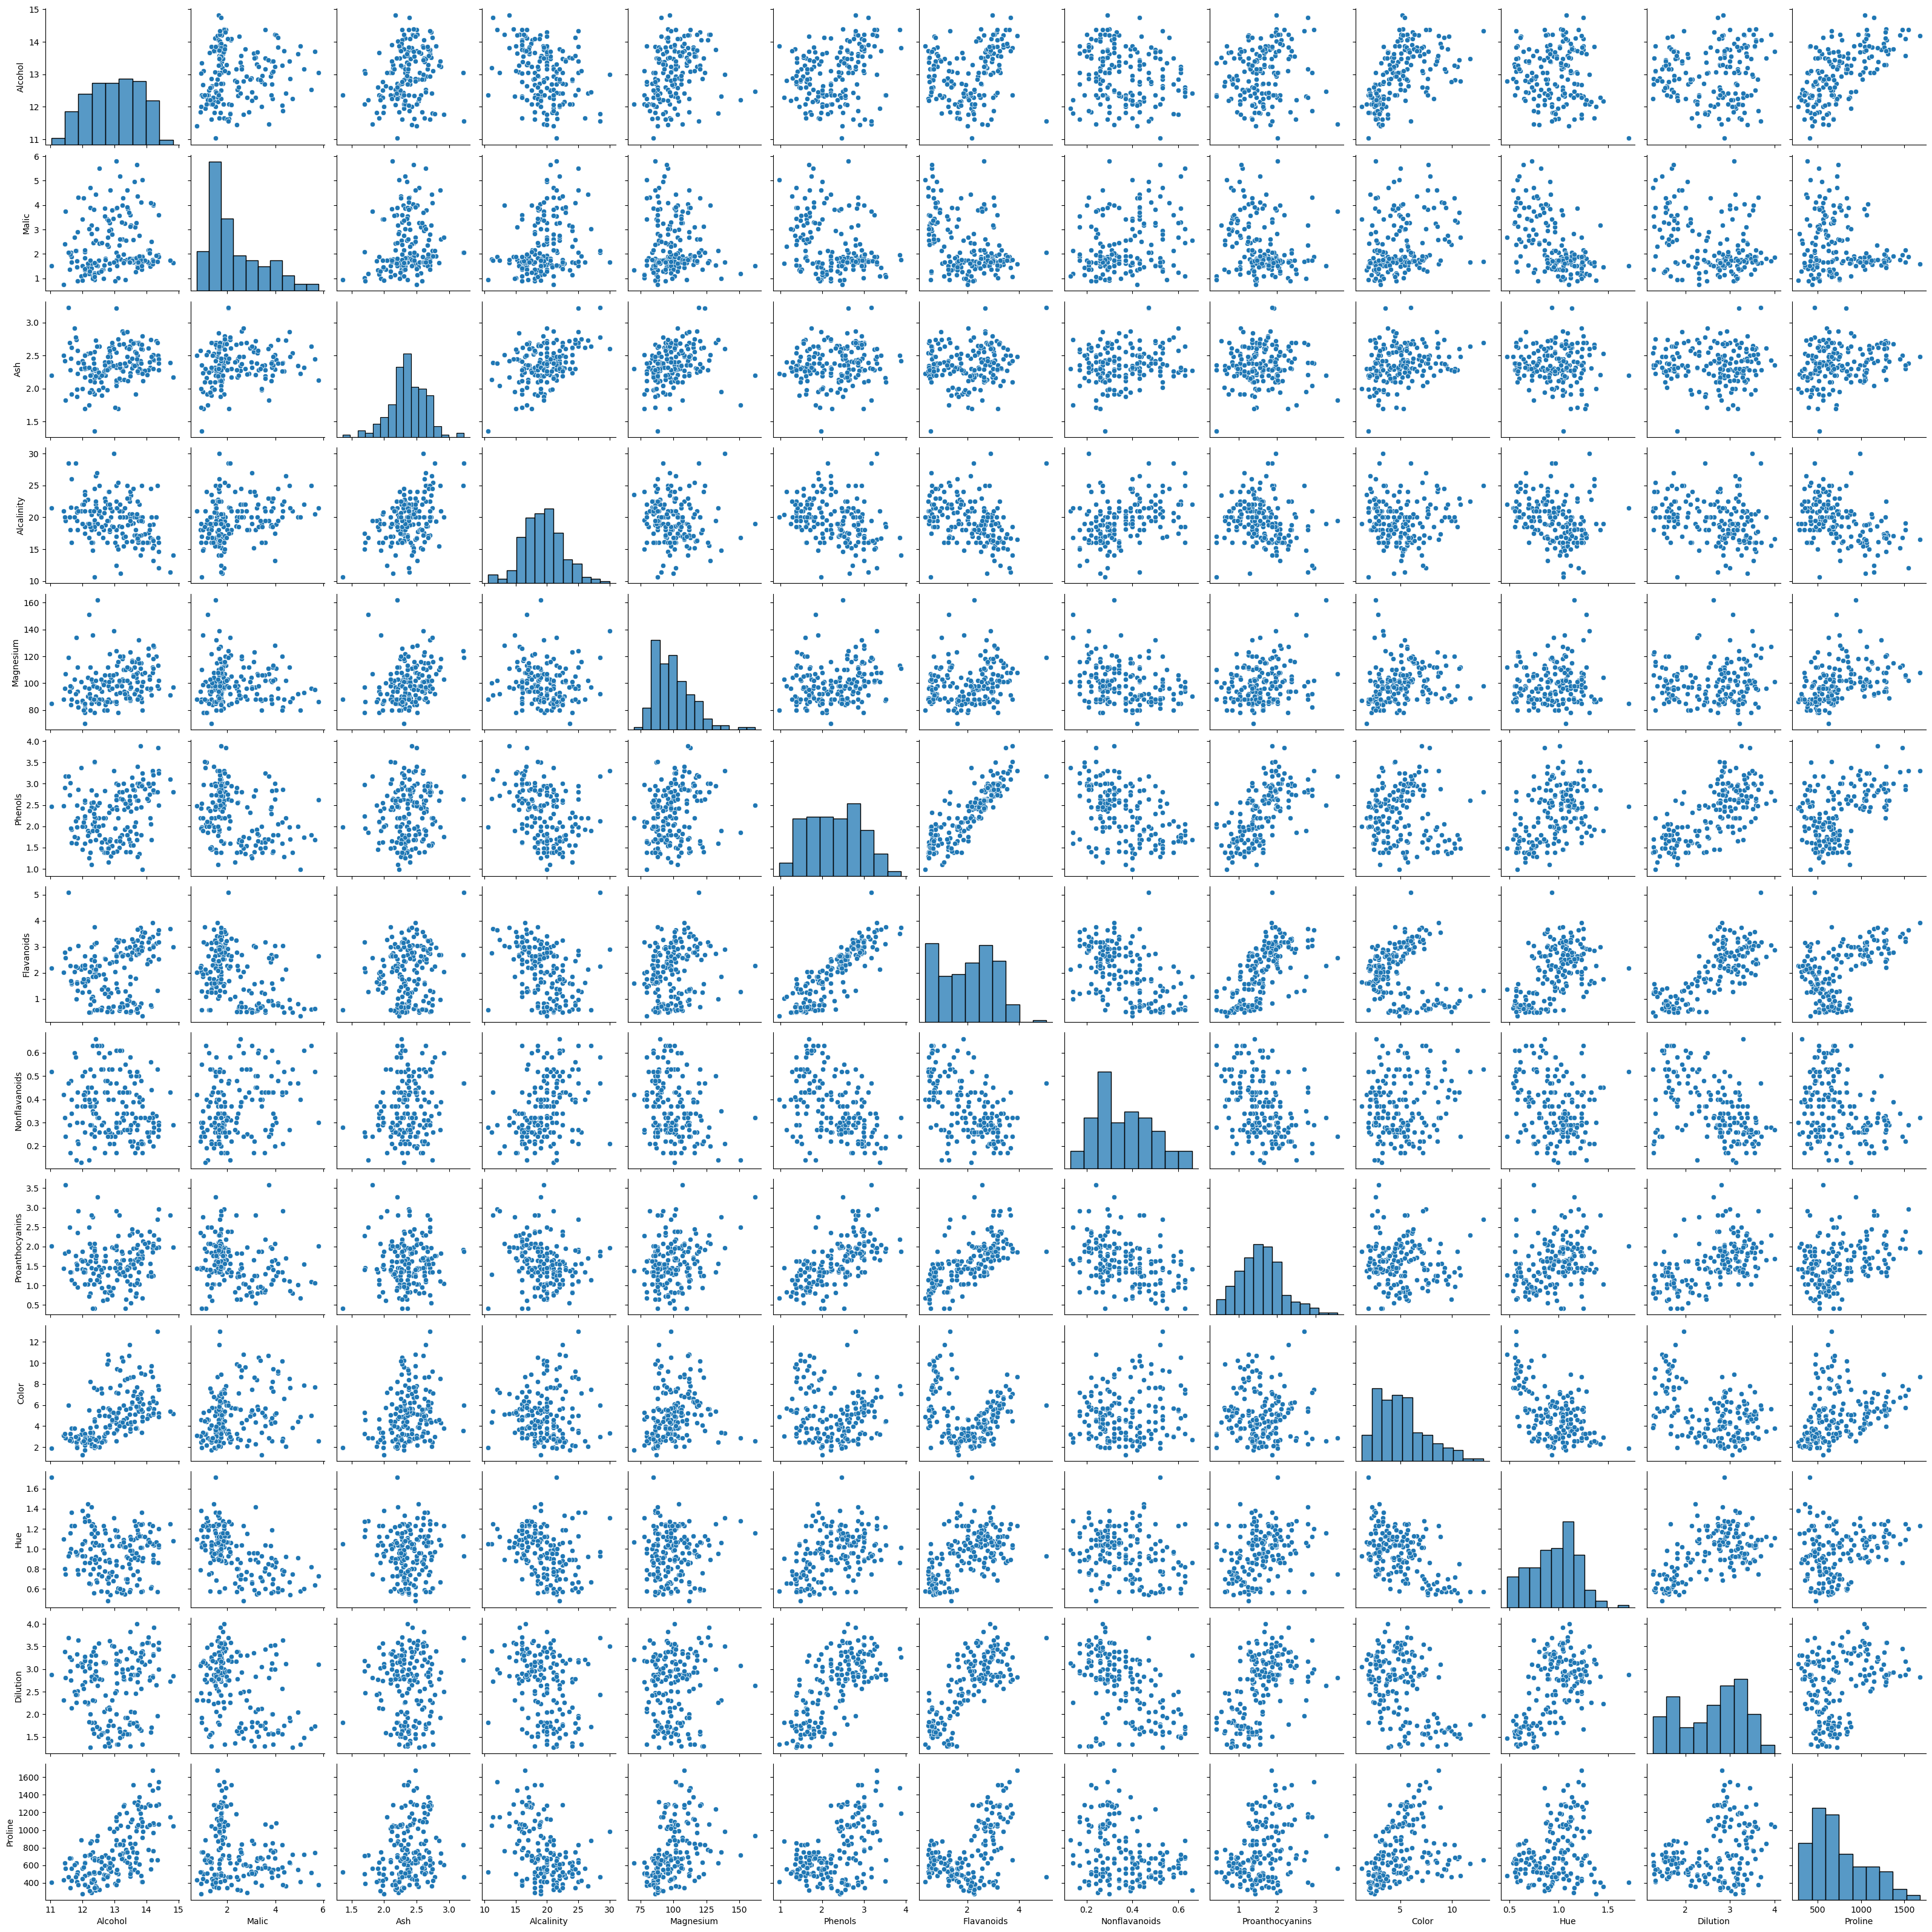

In [15]:
sns.pairplot(data)

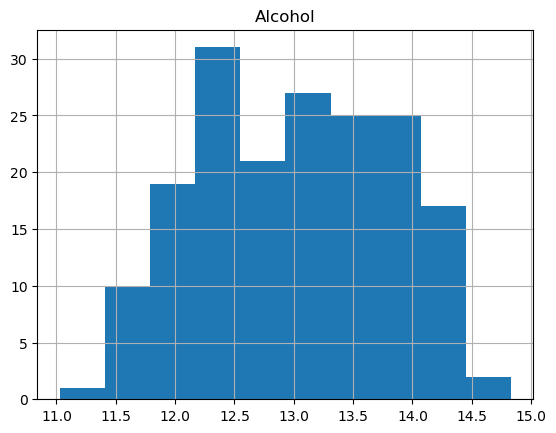

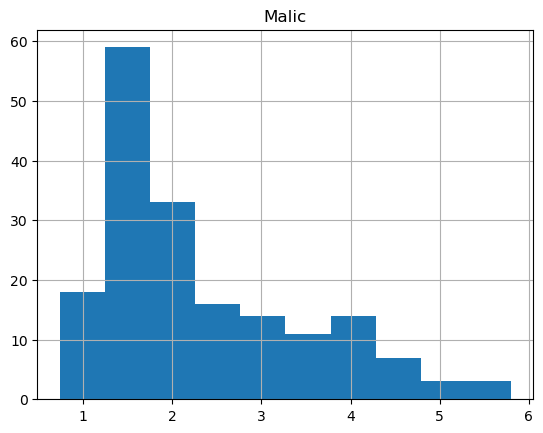

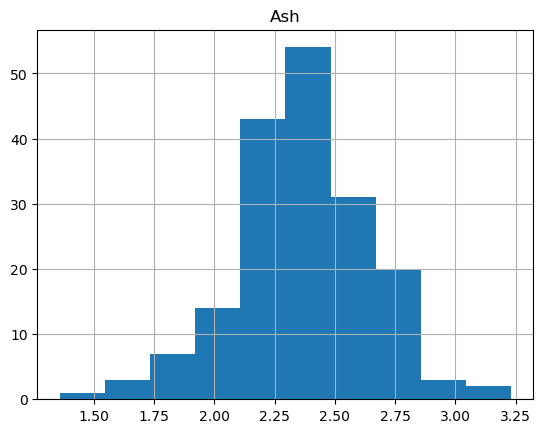

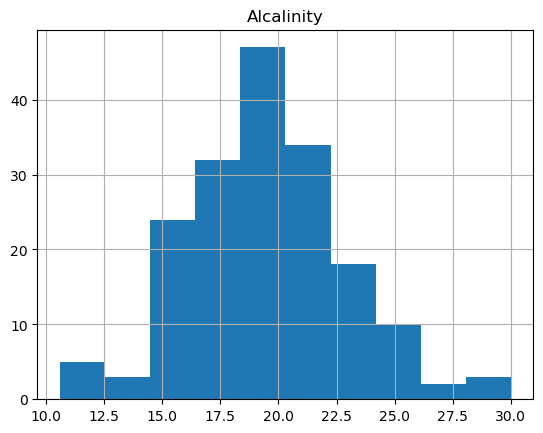

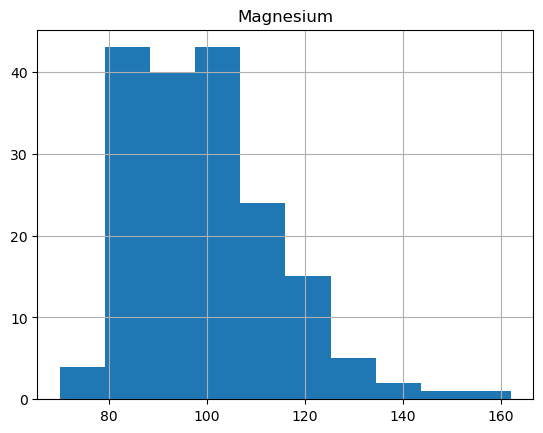

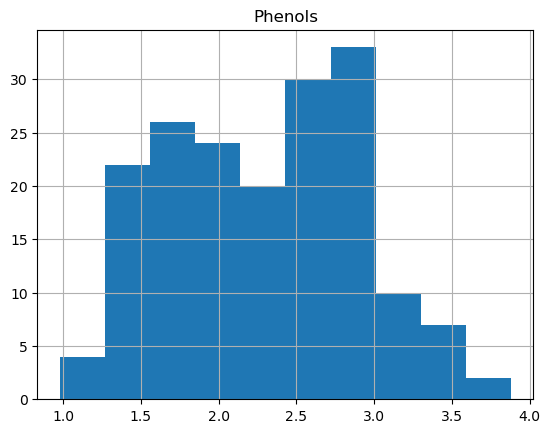

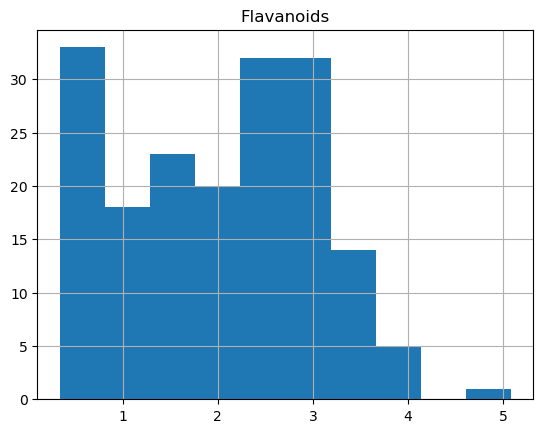

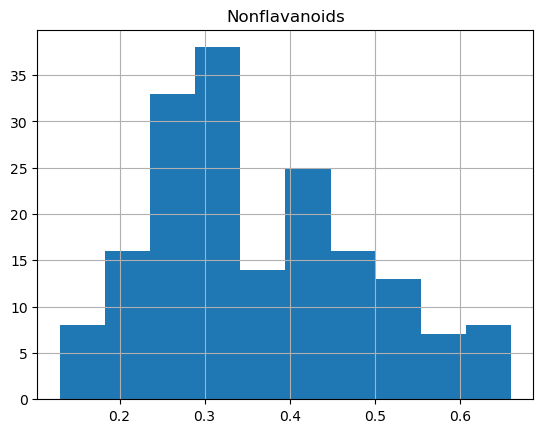

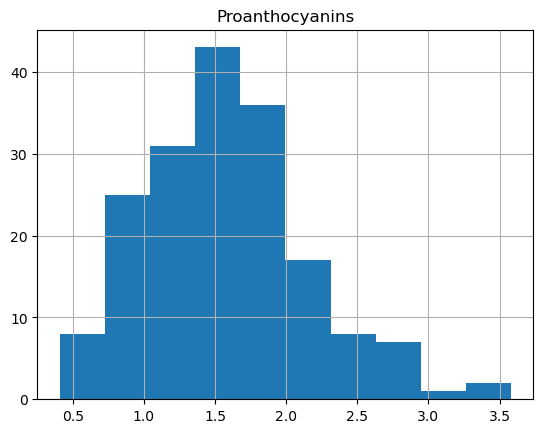

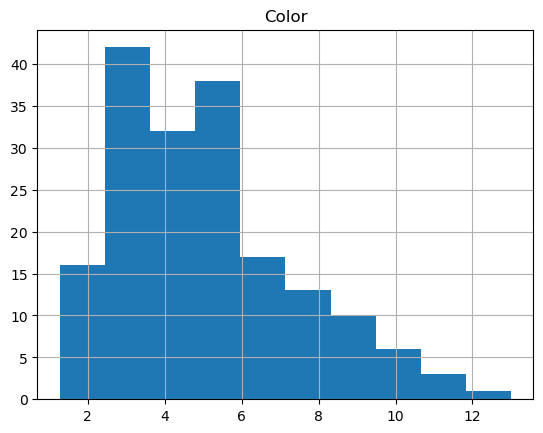

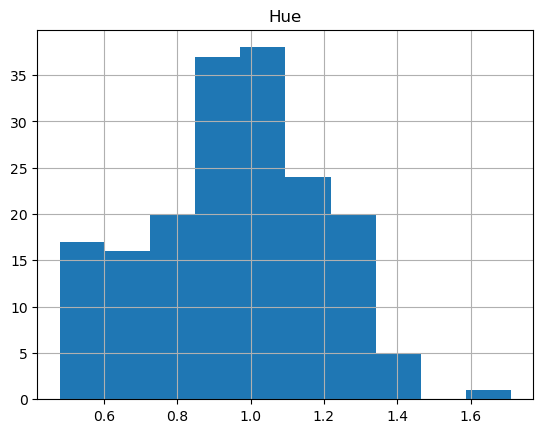

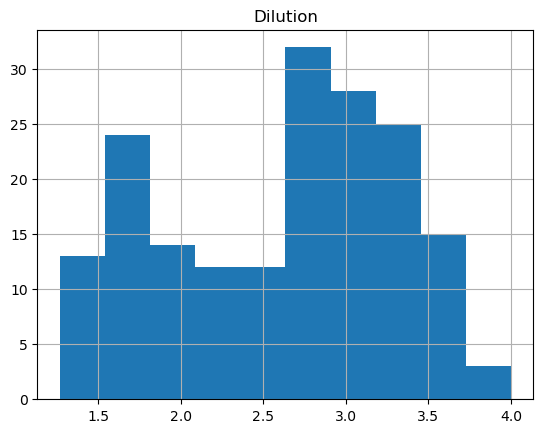

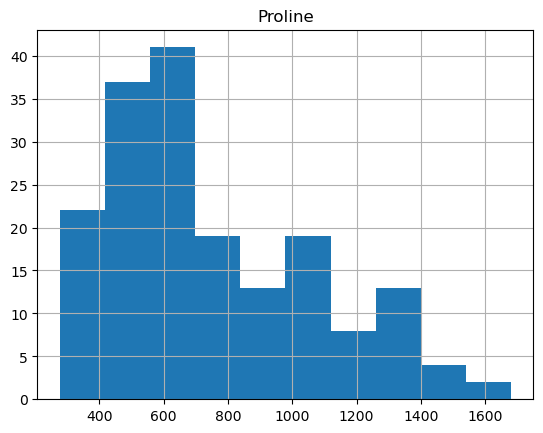

In [16]:
#Histogram for every feature in the dataset
for feature in data.columns:
    data[feature].hist()
    plt.title(feature)
    plt.show()

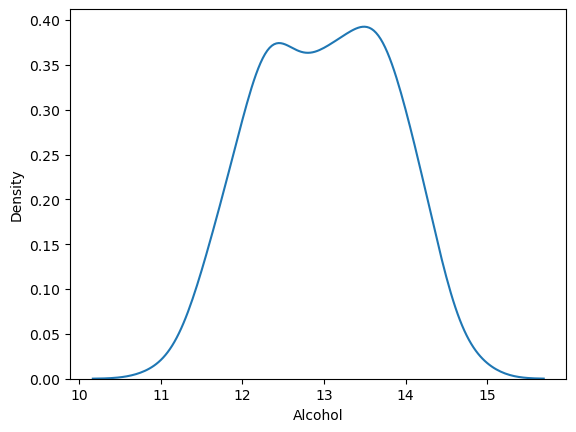

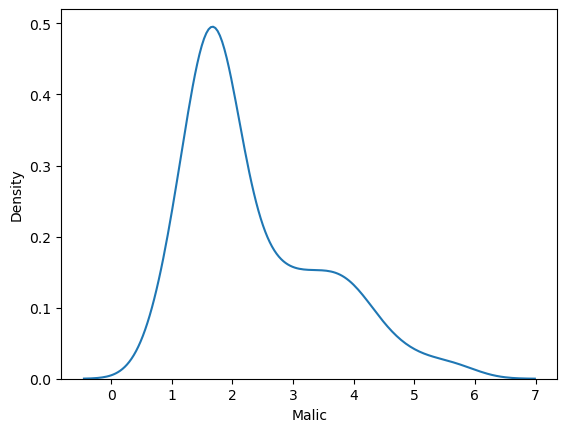

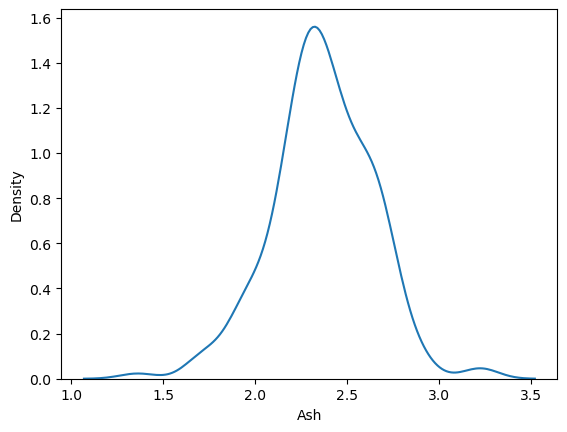

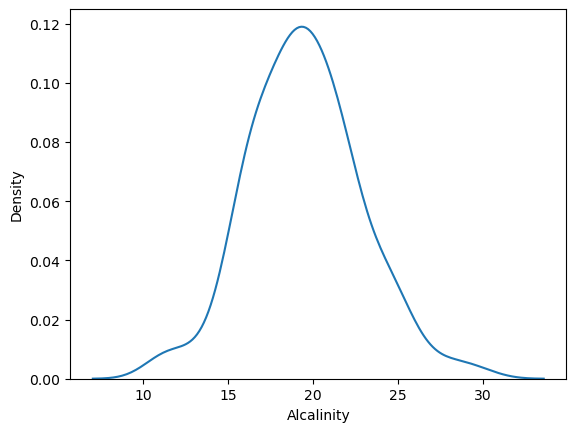

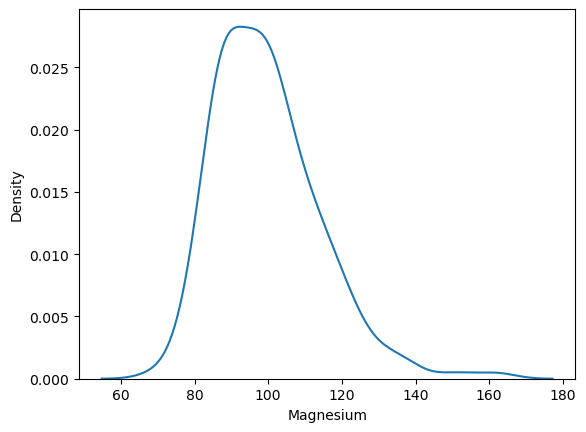

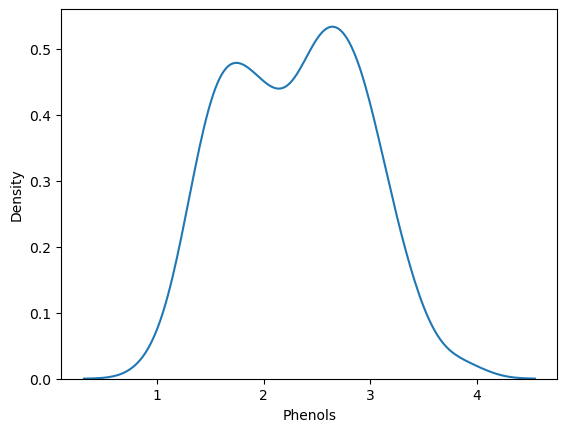

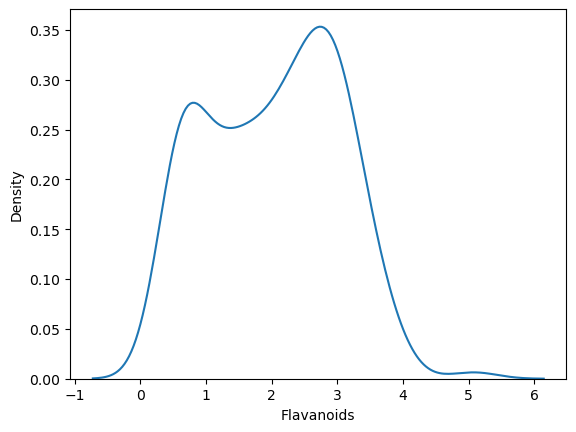

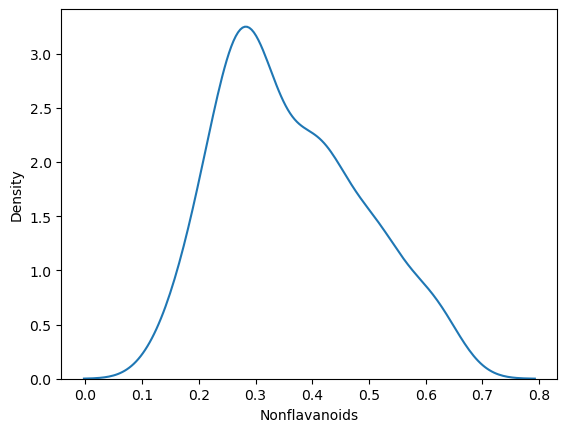

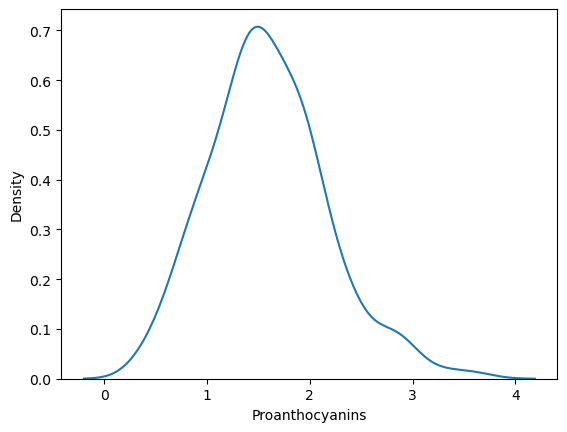

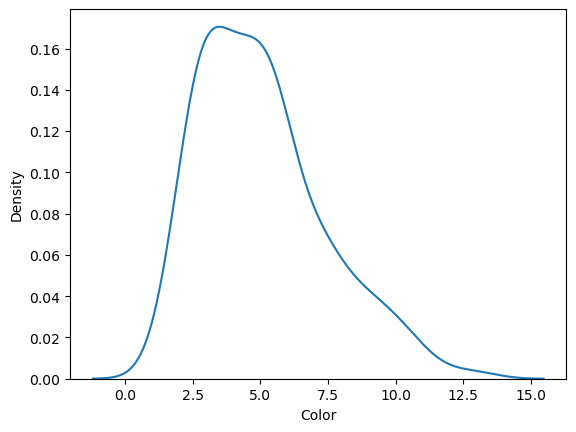

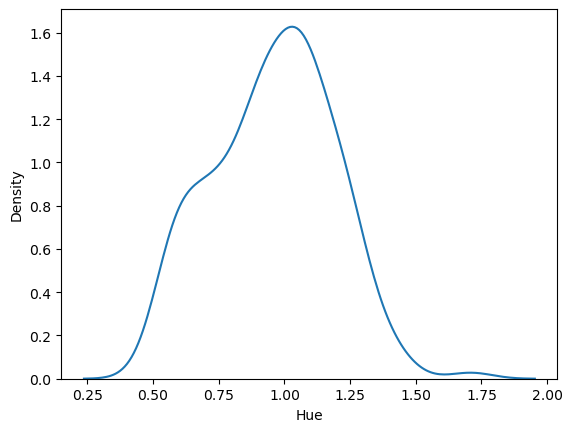

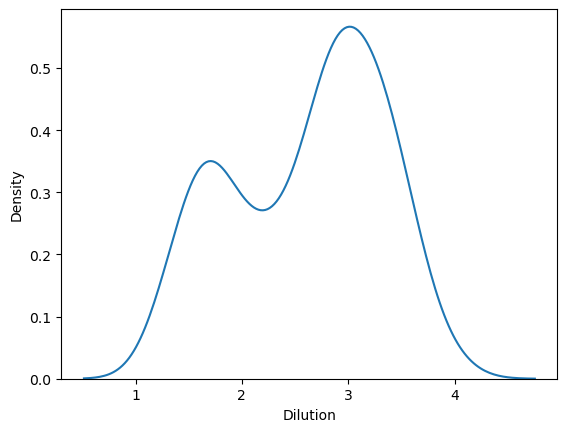

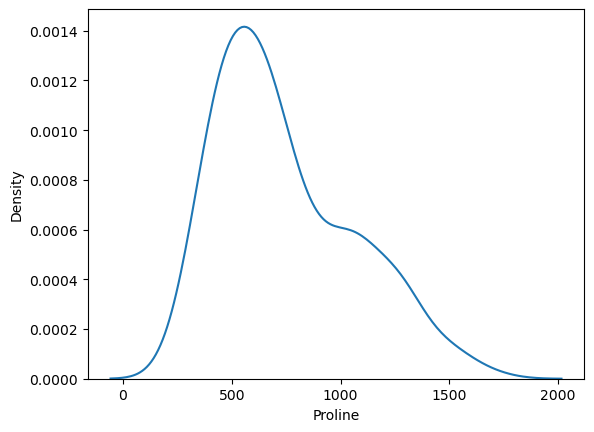

In [17]:
#Density Plot for every feature
for feature in data.columns:
    sns.kdeplot(data[feature])
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


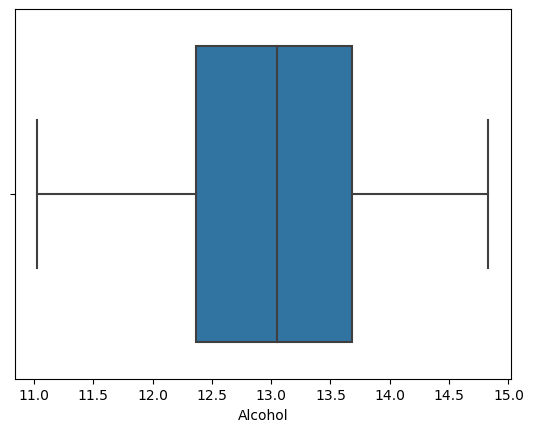

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


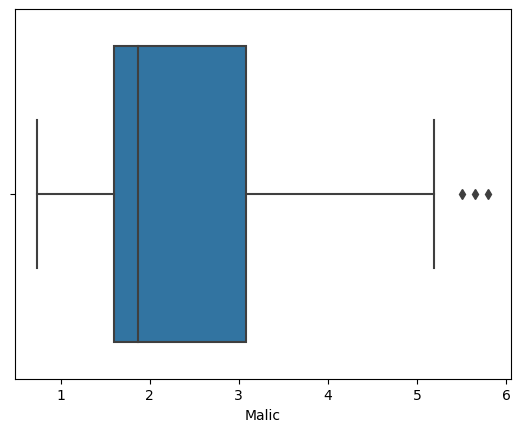

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


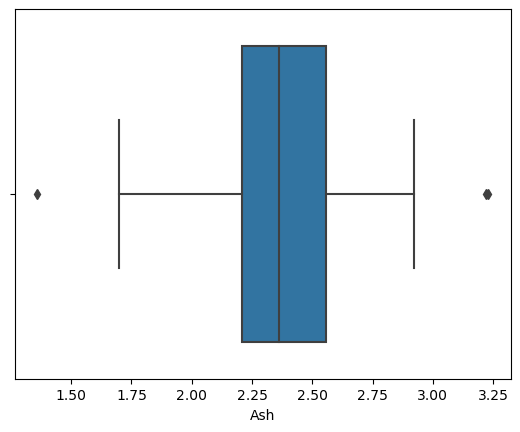

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


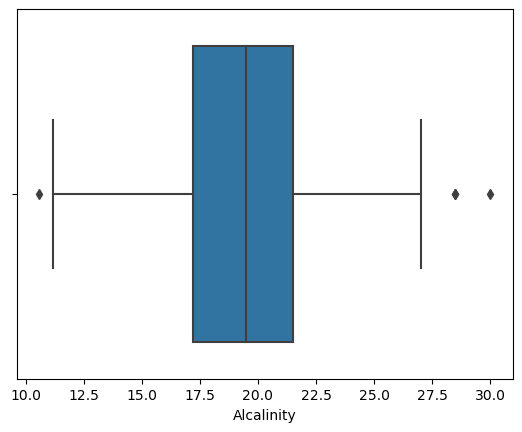

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


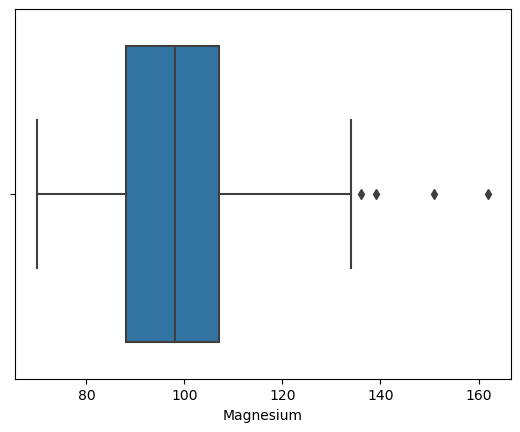

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


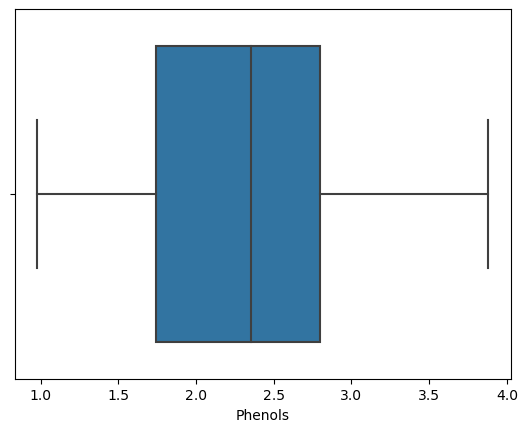

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


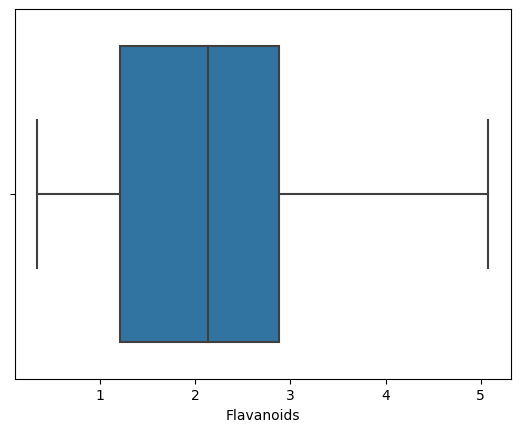

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


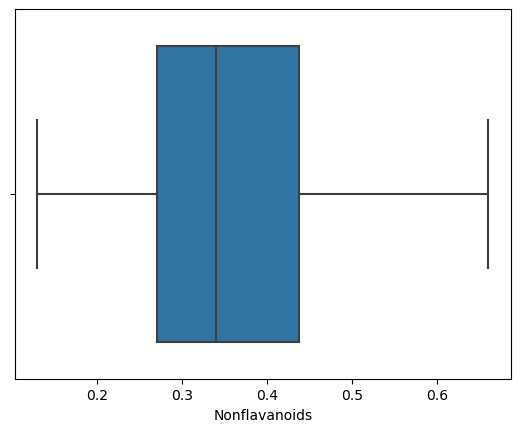

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


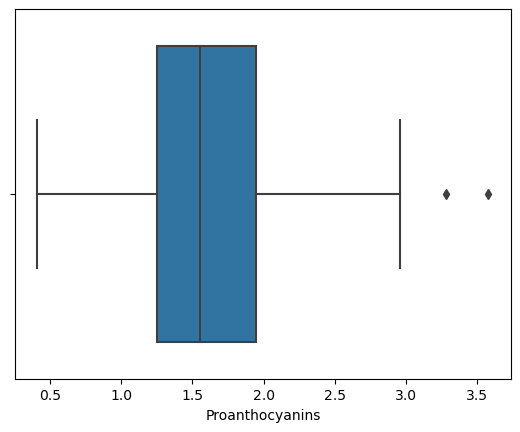

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


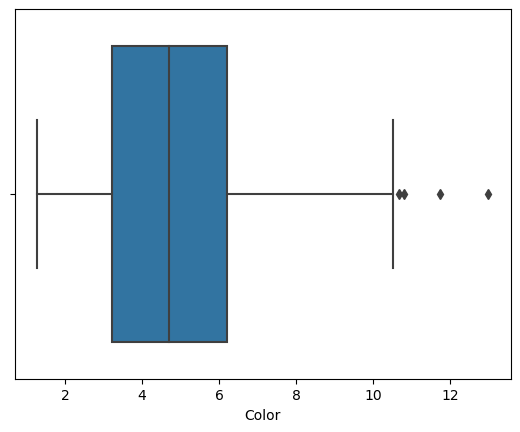

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


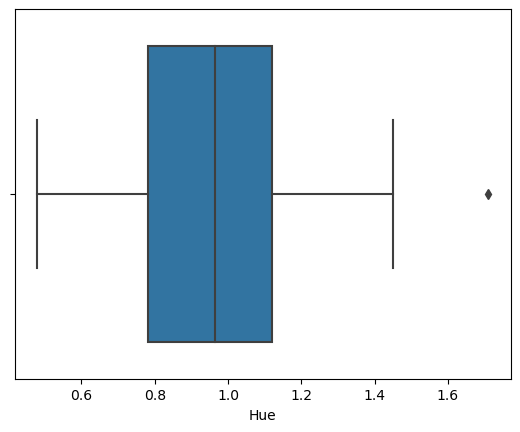

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


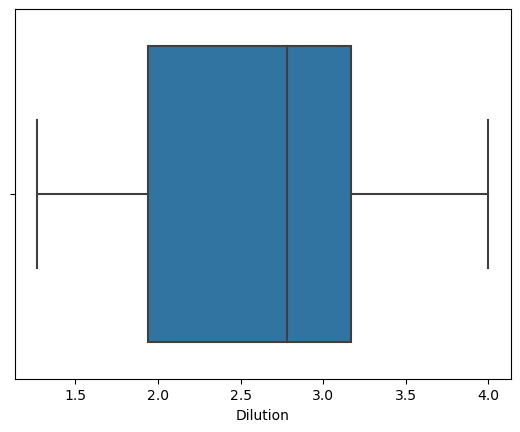

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


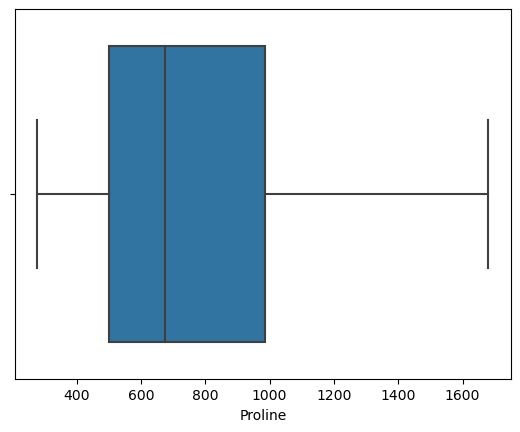

In [18]:
#Outlier Detection
for feature in data.columns:
    sns.boxplot(data[feature])
    plt.show()

In [19]:
#Correlation
data.corr()

Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Alcohol          1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic            0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash              0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity      -0.310235  0.288500  0.443367    1.000000  -0.083333   
Magnesium        0.270798 -0.054575  0.286587   -0.083333   1.000000   
Phenols          0.289101 -0.335167  0.128980   -0.321113   0.214401   
Flavanoids       0.236815 -0.411007  0.115077   -0.351370   0.195784   
Nonflavanoids   -0.155929  0.292977  0.186230    0.361922  -0.256294   
Proanthocyanins  0.136698 -0.220746  0.009652   -0.197327   0.236441   
Color            0.546364  0.248985  0.258887    0.018732   0.199950   
Hue             -0.071747 -0.561296 -0.074667   -0.273955   0.055398   
Dilution         0.072343 -0.368710  0.003911   -0.276769   0.066004   
Proline          0.643720 -0.192011  0.223626   -0.440597   0.393351   

                  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
Alcohol          0.289101    0.236815      -0.155929         0.136698   
Malic           -0.335167   -0.411007       0.292977        -0.220746   
Ash              0.128980    0.115077       0.186230         0.009652   
Alcalinity      -0.321113   -0.351370       0.361922        -0.197327   
Magnesium        0.214401    0.195784      -0.256294         0.236441   
Phenols          1.000000    0.864564      -0.449935         0.612413   
Flavanoids       0.864564    1.000000      -0.537900         0.652692   
Nonflavanoids   -0.449935   -0.537900       1.000000        -0.365845   
Proanthocyanins  0.612413    0.652692      -0.365845         1.000000   
Color           -0.055136   -0.172379       0.139057        -0.025250   
Hue              0.433681    0.543479      -0.262640         0.295544   
Dilution         0.699949    0.787194      -0.503270         0.519067   
Proline          0.498115    0.494193      -0.311385         0.330417   

                    Color       Hue  Dilution   Proline  
Alcohol          0.546364 -0.071747  0.072343  0.643720  
Malic            0.248985 -0.561296 -0.368710 -0.192011  
Ash              0.258887 -0.074667  0.003911  0.223626  
Alcalinity       0.018732 -0.273955 -0.276769 -0.440597  
Magnesium        0.199950  0.055398  0.066004  0.393351  
Phenols         -0.055136  0.433681  0.699949  0.498115  
Flavanoids      -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids    0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins -0.025250  0.295544  0.519067  0.330417  
Color            1.000000 -0.521813 -0.428815  0.316100  
Hue             -0.521813  1.000000  0.565468  0.236183  
Dilution        -0.428815  0.565468  1.000000  0.312761  
Proline          0.316100  0.236183  0.312761  1.000000

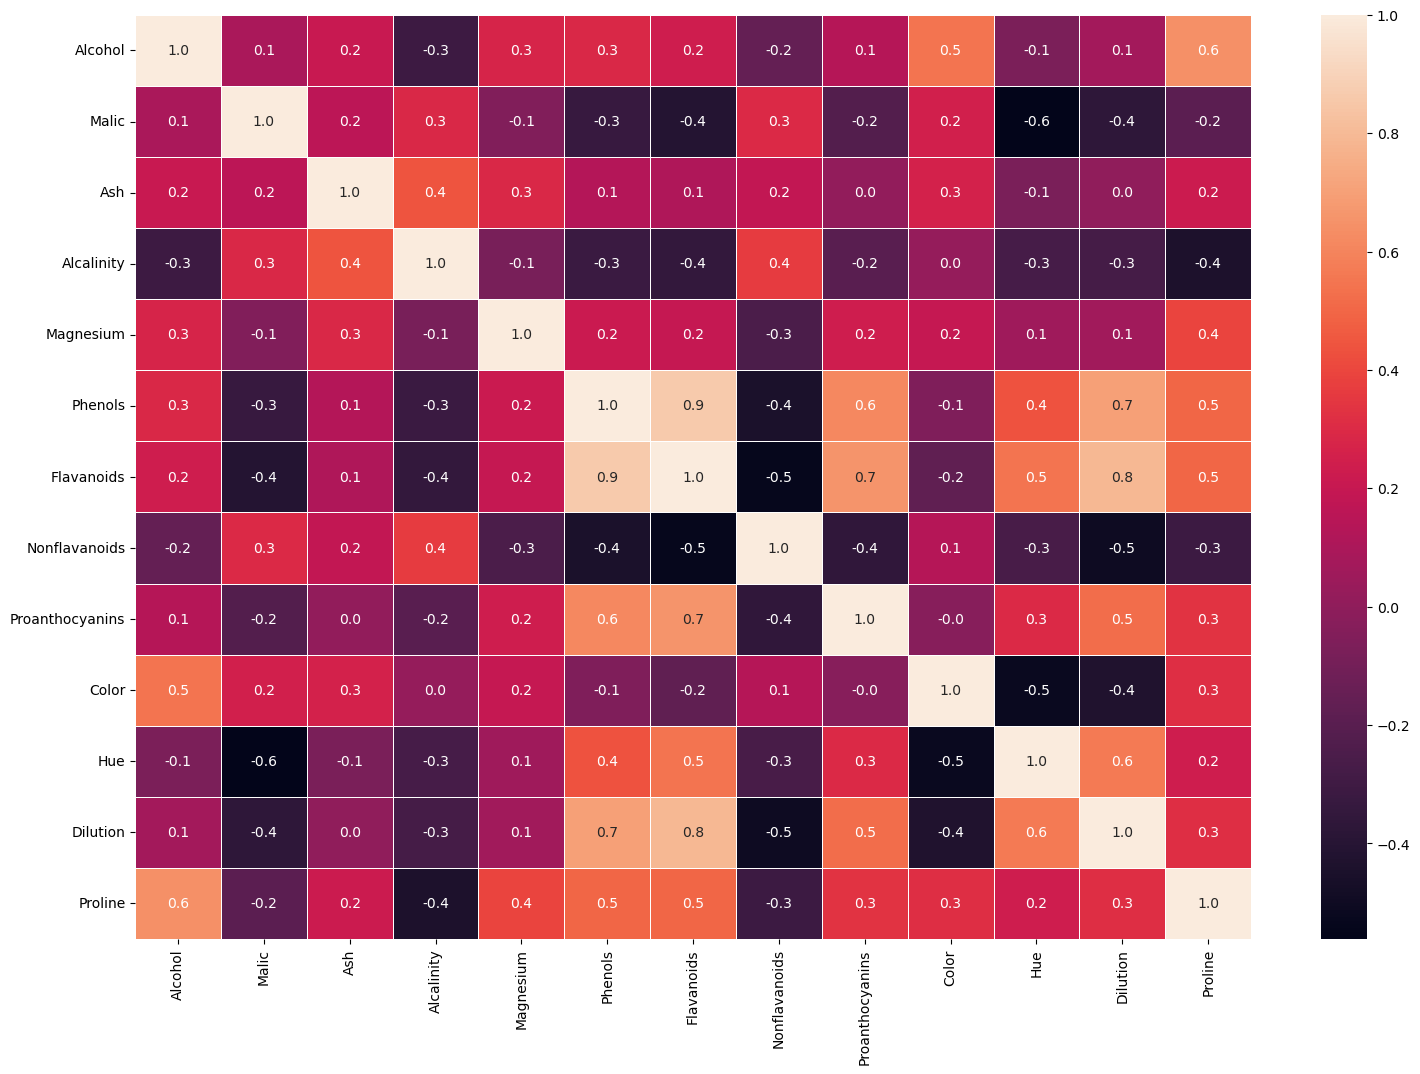

In [20]:
#Heatmap for Correlation Vizualization
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot= True, linewidths=0.5, fmt='.1f', ax=ax)
plt.show()

<b>Points to be noted:- </b>


Phenols is positively correlated related to Flavanoids, Proanthocyanins, Dilution

Flavanoids is positively correlated related to Proanthocyanins, Dilution

Dilution is positively correlated related to Hue

Alcohol is positively correlated related to Proline

In [21]:
data.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

# Data Preprocessing

In [22]:
# Data Standardization

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
std_data = StandardScaler.fit_transform(data)
std_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [23]:
#data normalization

from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
norm_data = MinMax.fit_transform(data)
norm_data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# PCA

<b>PCA is a Dimensionality Reduction Technique.</b>

<b>Why Dimensionality Reduction is Important ?</b>

In realtime Datasets we have hundereds of columns and lakhs of records. So, increasing only one more columns adds lakhs of records, making it more computationally expensive.

So if we can reduce even one columns, we can reduce lakhs of record making it computationally less expensive.

It also helps with space and time complexity. It increases efficiency of the algorithms to some extent.

<b>How to reduce dimensionlaity ?</b>

Every column in the dataset give us some amount of information, on which we make our predictions. So reducing dimentionality means we will lose some amount of imformation, meaning out accuracy will be less.

So, we have to balance 2 conditions reducing dimensions and not losing information.If we hold on both conditions tightly then we cant make any decision.

If we are ready to lose some information 2%, 3% or 5%, then we some technique that significantly reduces dimensionalty.

If we hold on to 100% information, we will get accurate results but it will take too much time. On other hand if we lose some information the speed will increase drastically with slightly less accuracy 

<b>High Variance = Lots of Information</b>

Principle Component Analysis is a magic box. What it does is, it smartly shifts your co-ordinate axis and for everypoint it computes new co-ordinates.

That means with respect to new axis which are getting formed, it will give us new co-ordinates.

We are not changing the data. We are simply writing the data in smart fashion.

PCA will give us same number of columns as in the original dataset. So, where is dimensionality reduction you ask ?

Yes, it will give us same number of columns, but those columns are arranged according to descending order of variation.

The final decision will be on us, how much information we are ready to lose.

<b>How are columns created ?</b>

The <b>columns are</b> created by some <b>linear combinations of original columns.</b>

ex. PC1 = 4(X1) + 2(X2) + 5(X3) + 15(X4) + 34(X5)

In the entire computation the of PCA, it finds coefficients.

<b>PCA also removes any multicollinearity</b> between the independent variables (Little bit of collinearity will always be present).

In [24]:
from sklearn.decomposition import PCA

In [25]:
#PCA for Standard dataset
pca = PCA()
pca_values1 = pca.fit_transform(std_data)
pca_values1

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [26]:
#Amount of variance each principle component expained
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [27]:
#Percentage of variance explained
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [28]:
#cumulative percentage of variance explained
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [29]:
#Actucal PCA components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

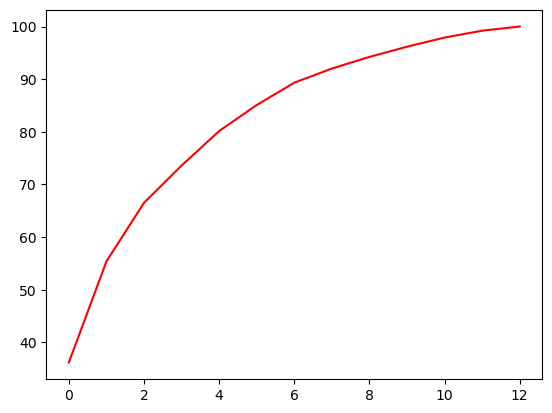

In [30]:
plt.plot(var1, color='red')
plt.show()

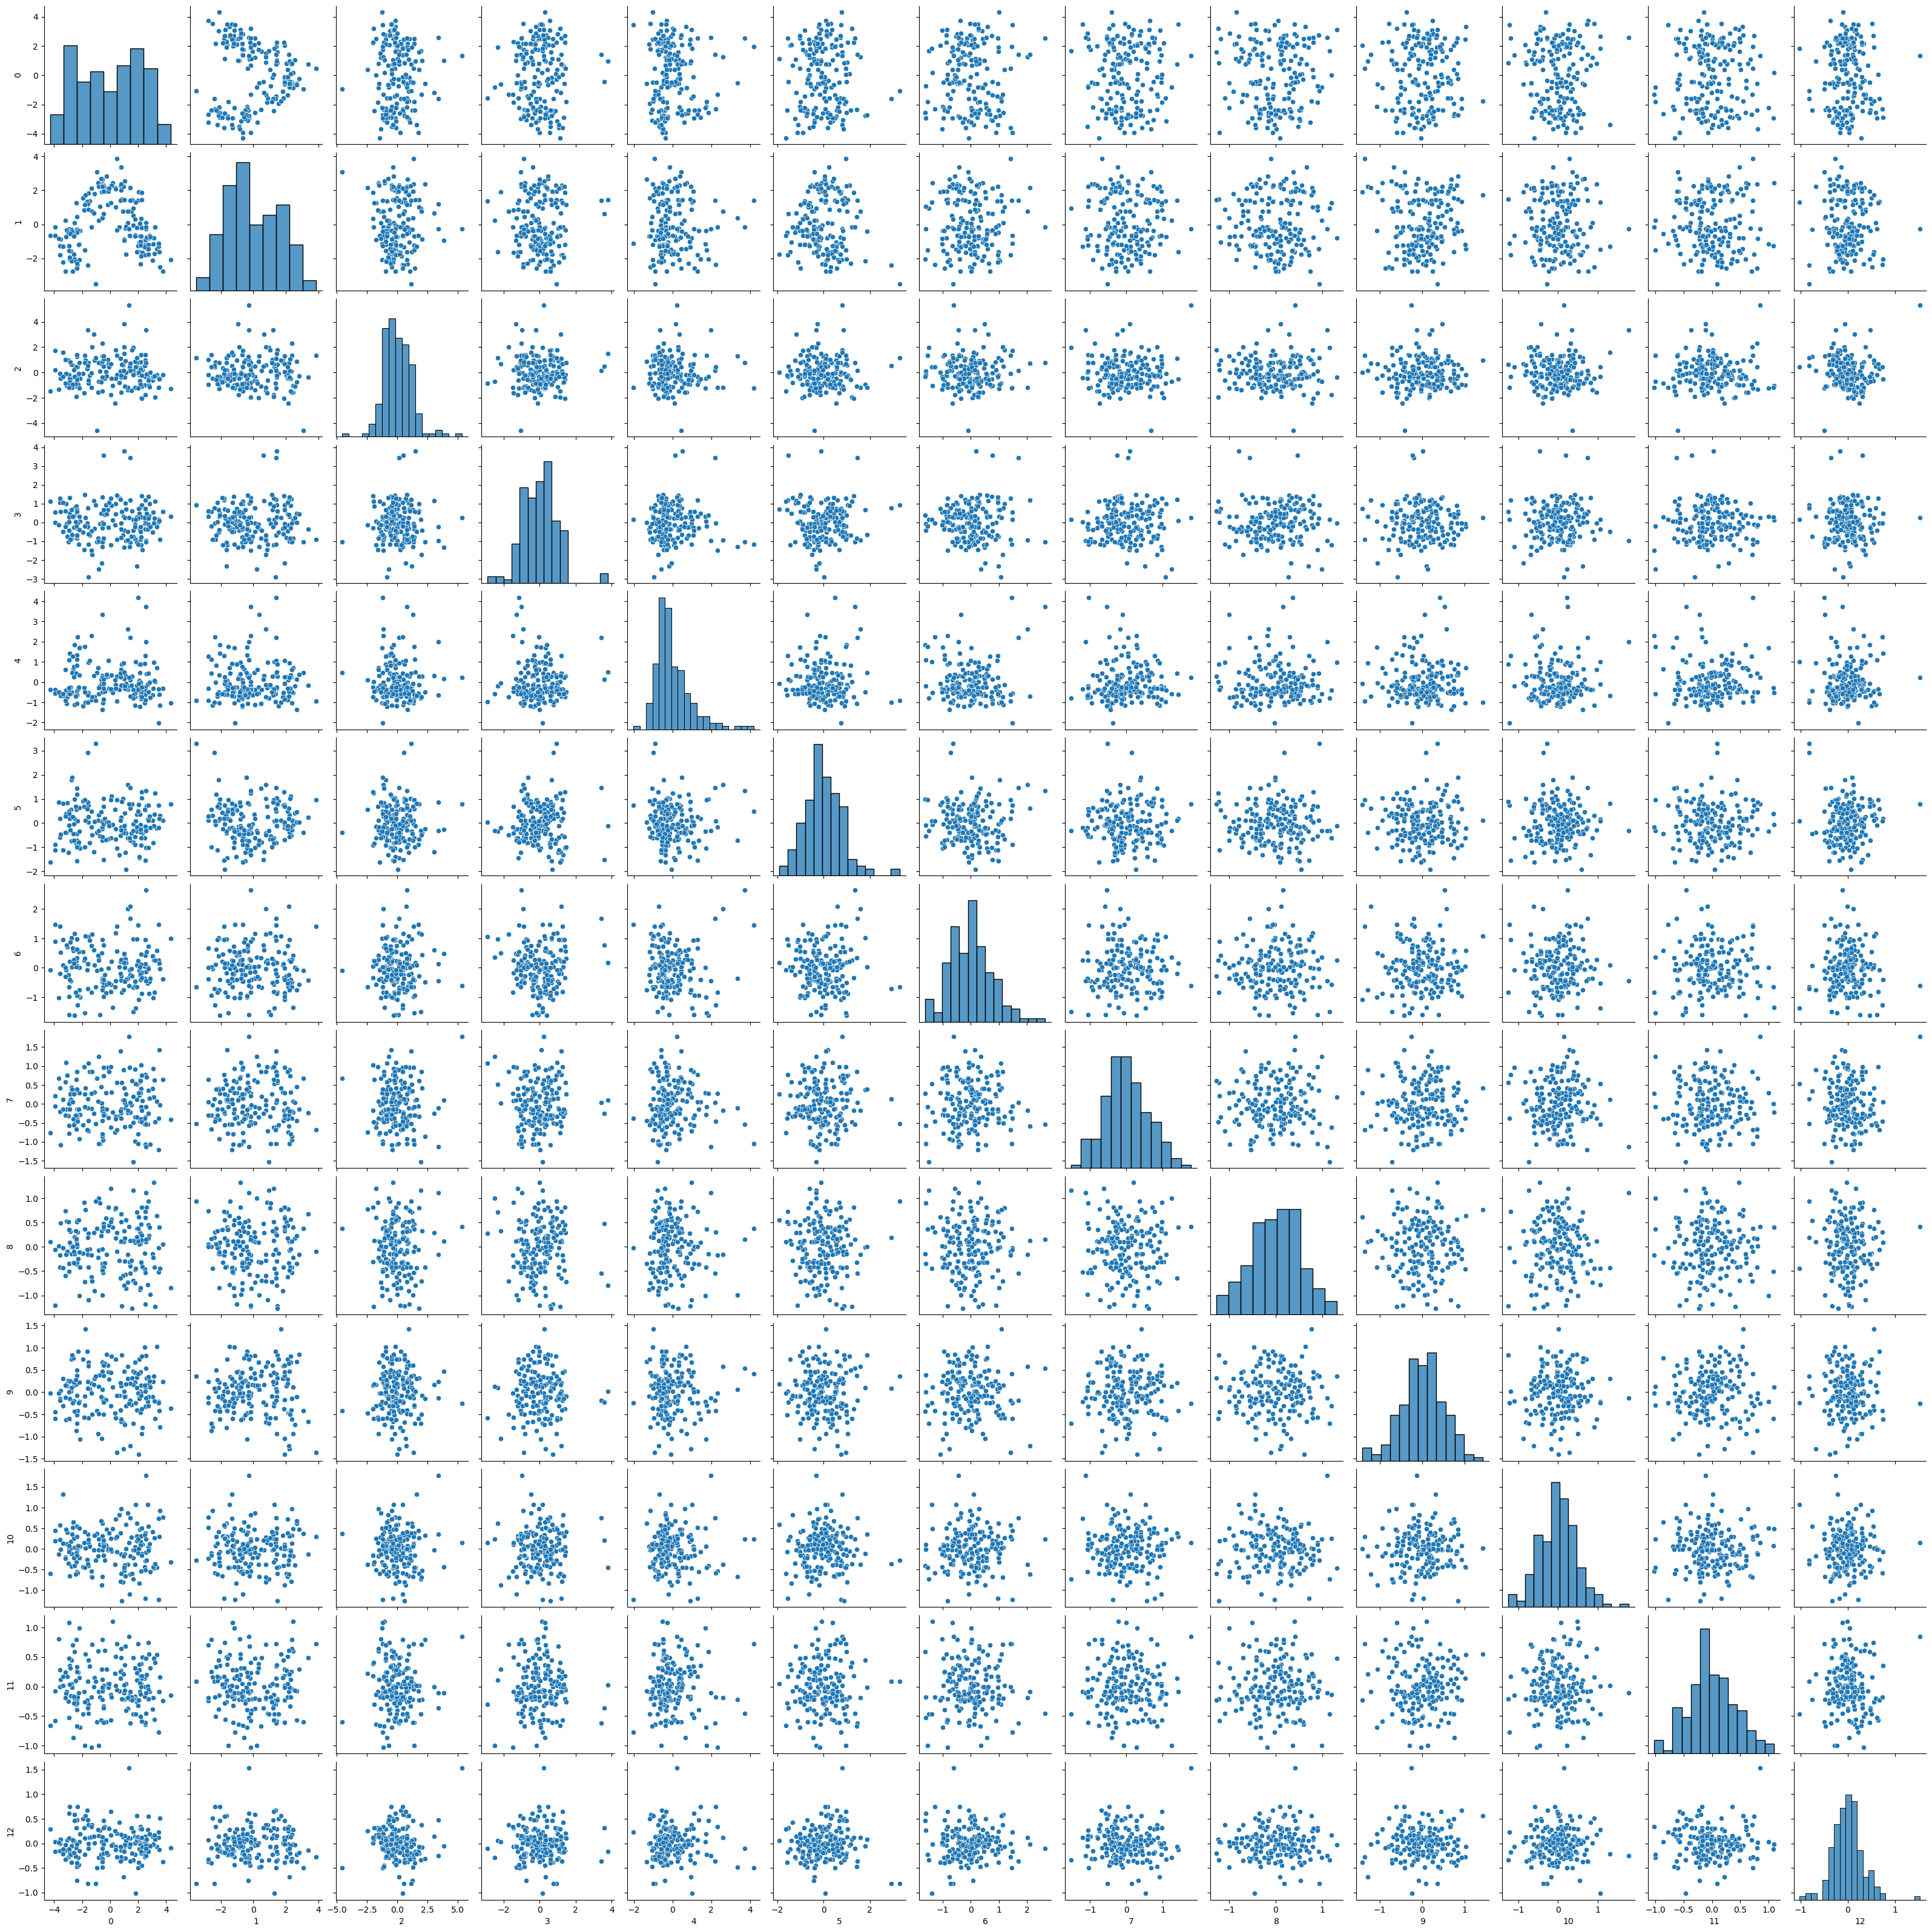

In [31]:
sns.pairplot(pd.DataFrame(pca_values1))
plt.show()

In [164]:
#PCA

pca = PCA(n_components = 3)
pca_std = pca.fit_transform(std_data)

#convert to dataframe
pca_stddf = pd.DataFrame(data = pca_std, columns = ['PC1','PC2','PC3'])

print(pca_stddf.shape)
pca_stddf.head()

(178, 3)


PC1       PC2       PC3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

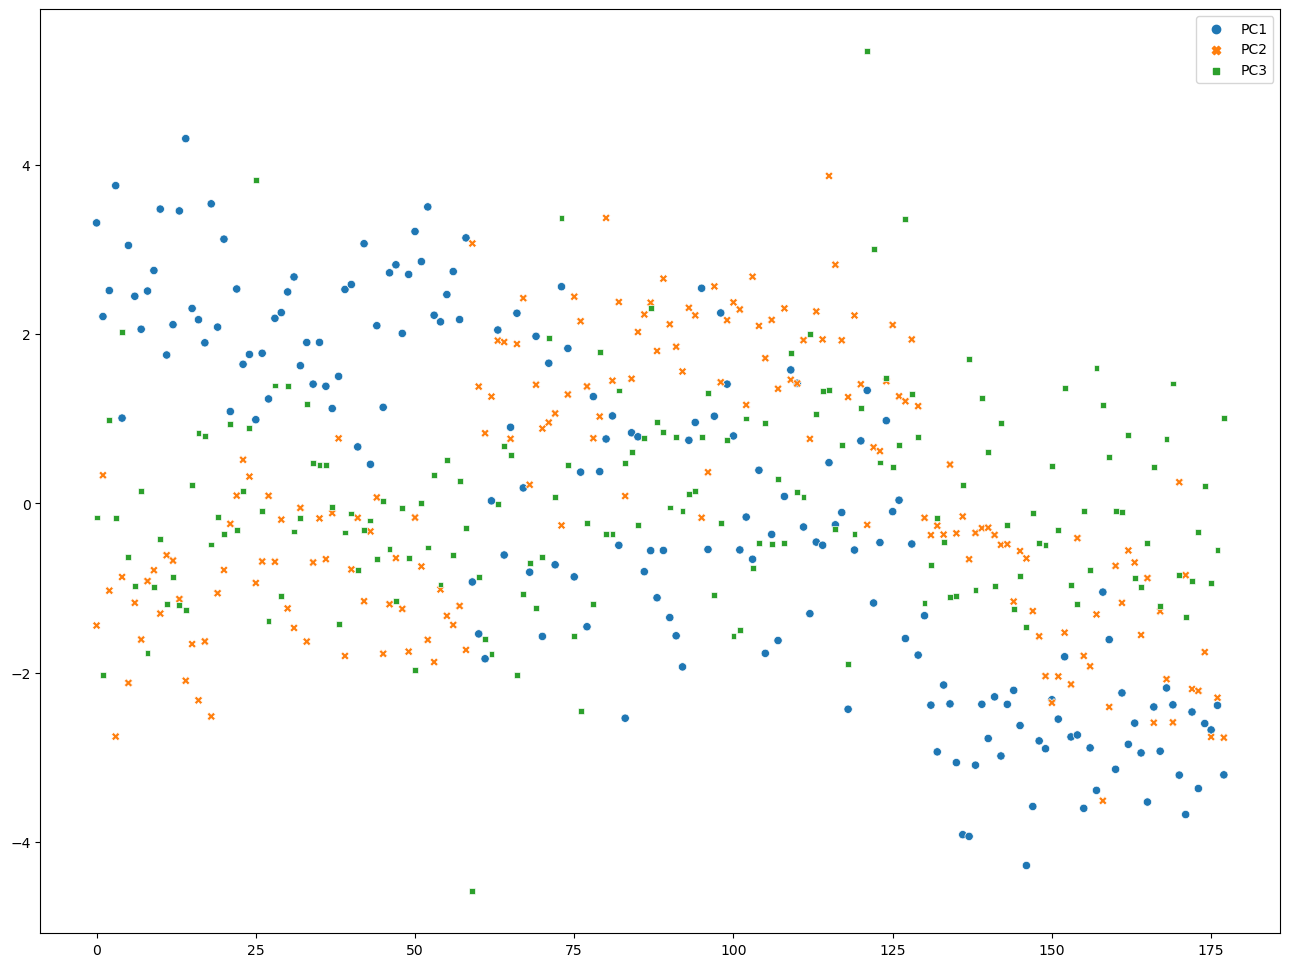

In [225]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=pca_stddf)
plt.show()

In [166]:
#PCA for Normalized dataset
pca = PCA()
pca_values2 = pca.fit_transform(norm_data)
pca_values2

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [167]:
#Amount of variance each principle component expained
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247, 0.04011226, 0.03005877,
       0.02516286, 0.01978926, 0.01301012, 0.01228411, 0.01215769,
       0.0074605 , 0.00687688, 0.00440241])

In [168]:
#Percentage of variance explained
var2 = pca.explained_variance_ratio_
var2

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [169]:
#cumulative percentage of variance explained
var3 = np.cumsum(np.round(var2, decimals=4)*100)
var3

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

In [170]:
#Actucal PCA components
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

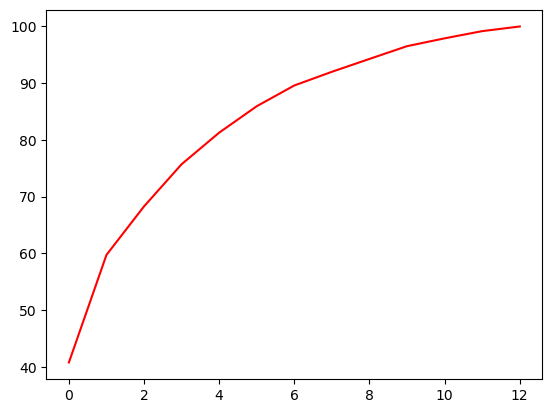

In [171]:
plt.plot(var3, color='red')
plt.show()

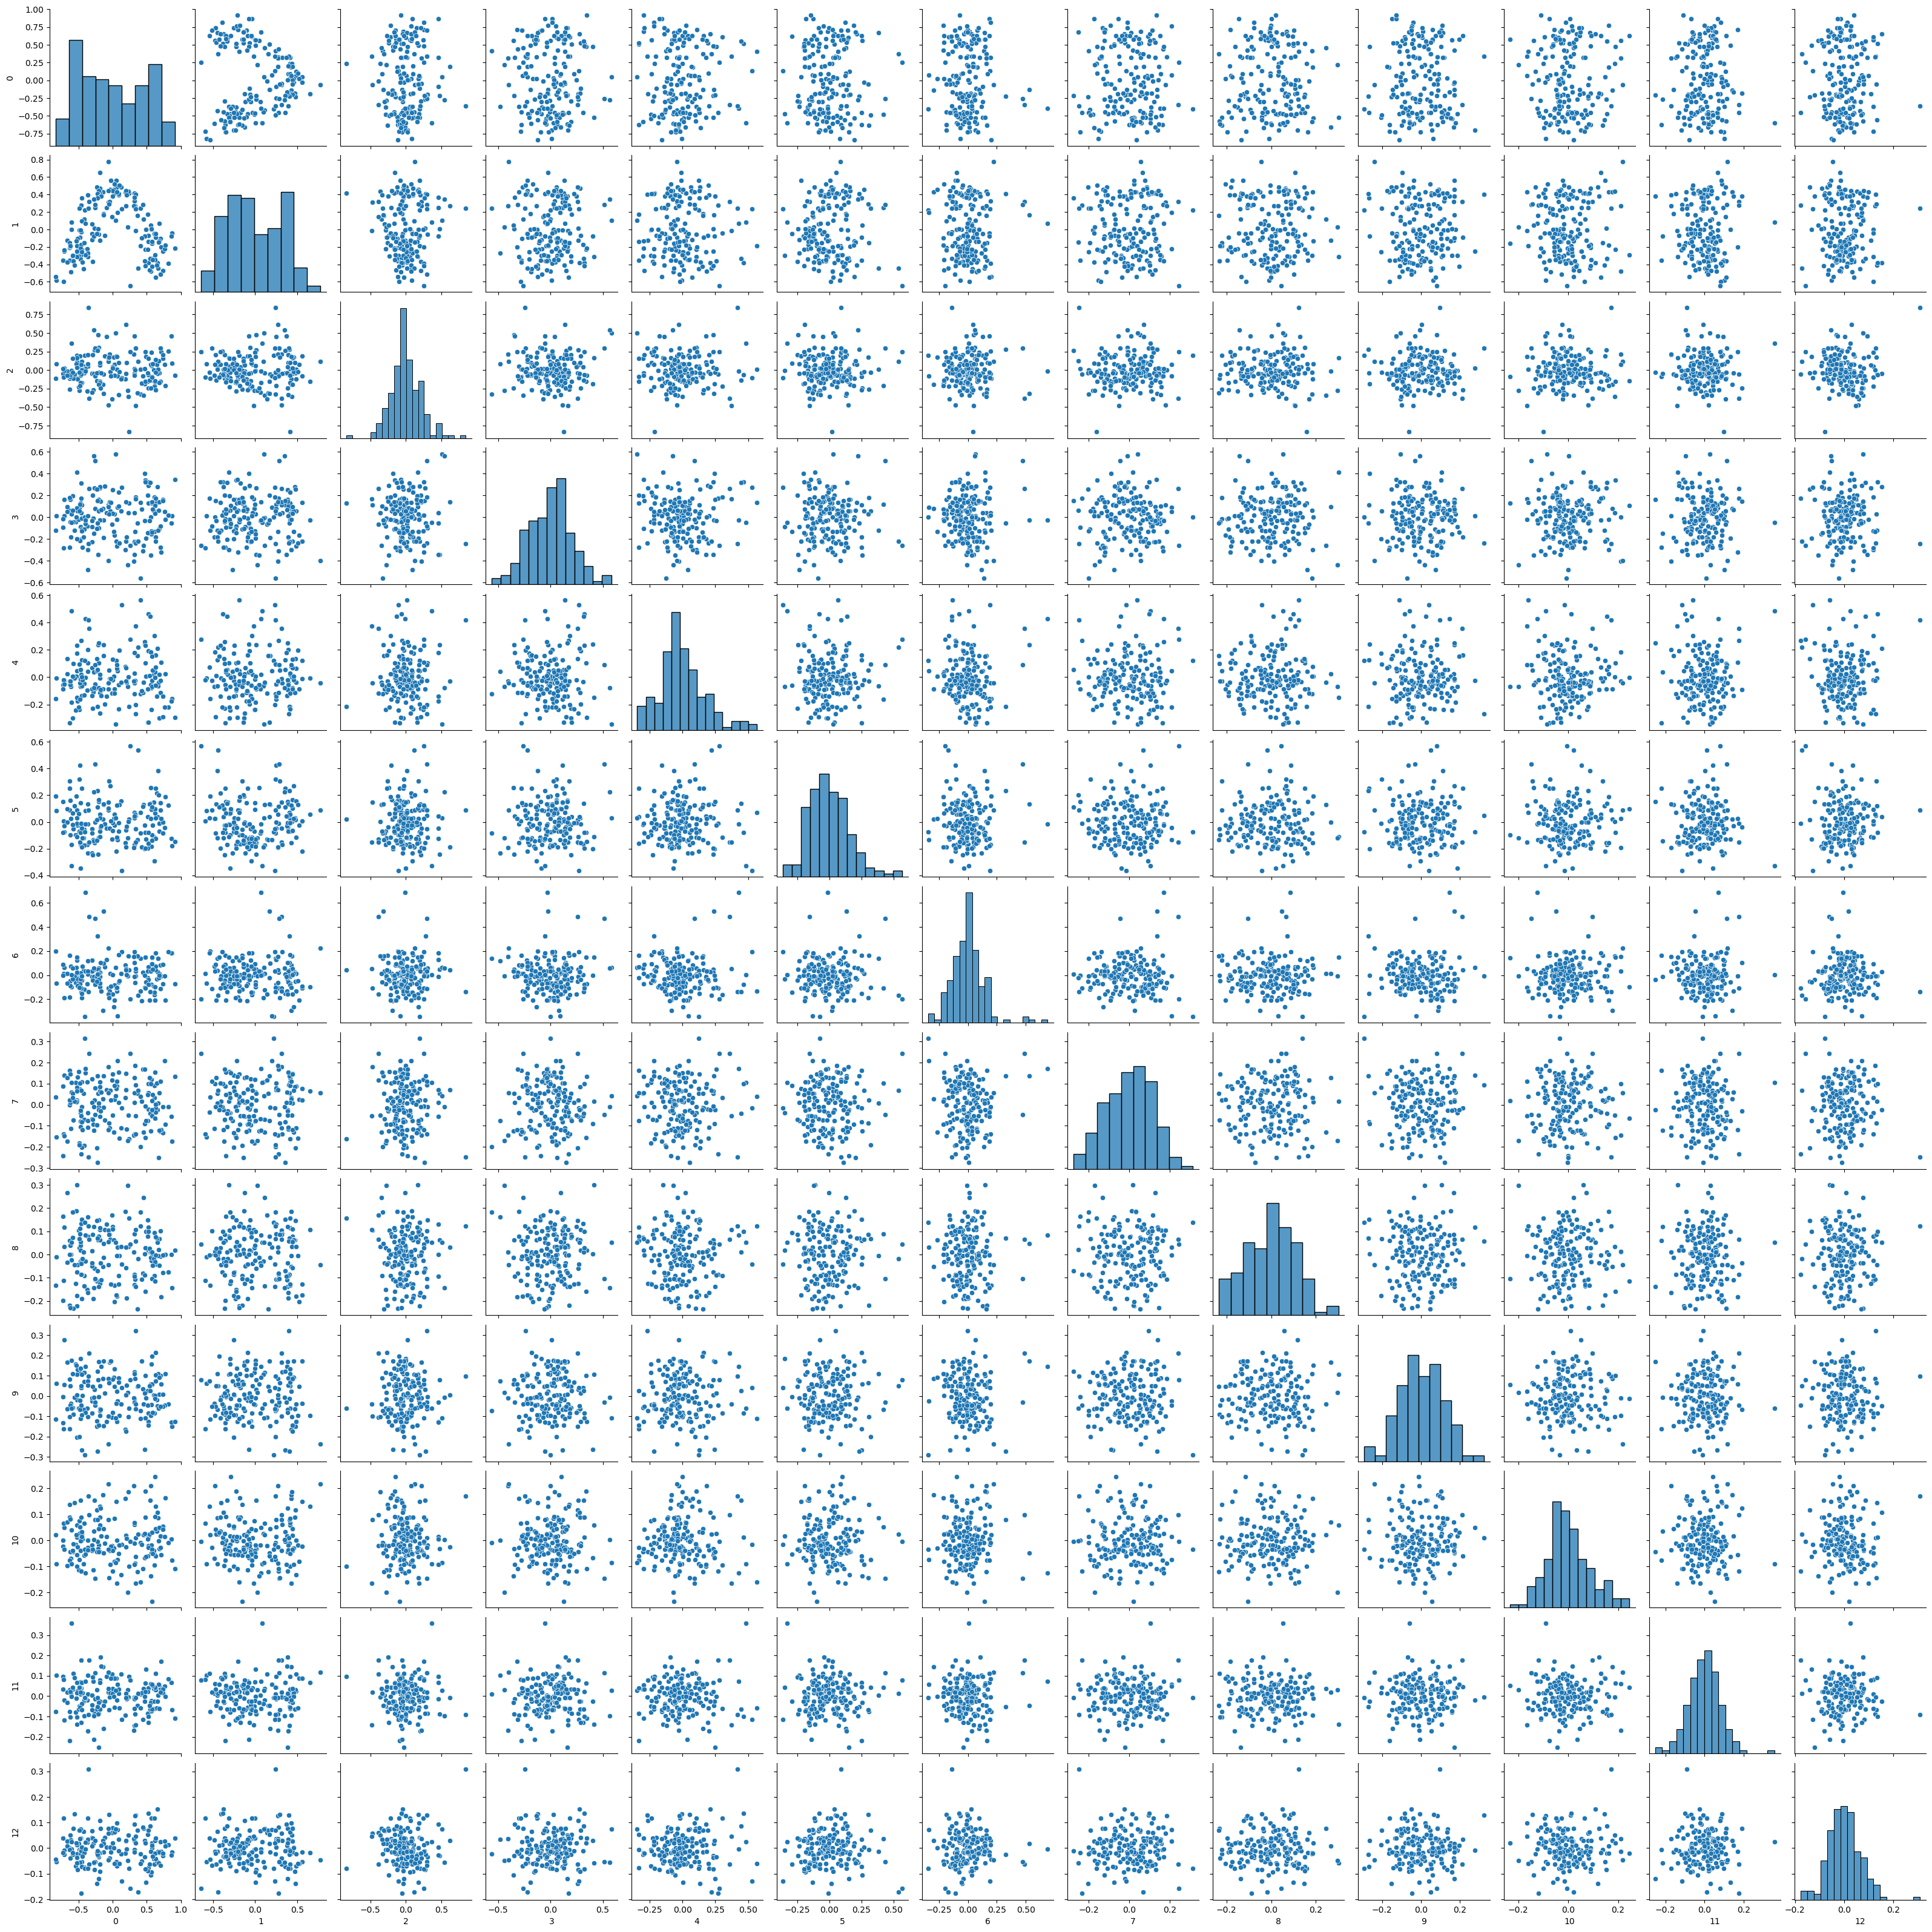

In [172]:
sns.pairplot(pd.DataFrame(pca_values2))
plt.show()

In [173]:
#PCA

pca = PCA(n_components = 3)
pca_norm = pca.fit_transform(norm_data)

#convert to dataframe
pca_normdf = pd.DataFrame(data = pca_norm, columns = ['PC1','PC2','PC3'])

print(pca_normdf.shape)
pca_normdf.head()

(178, 3)


PC1       PC2       PC3
0 -0.706336 -0.253193  0.024093
1 -0.484977 -0.008823 -0.280482
2 -0.521172 -0.189187  0.196217
3 -0.821644 -0.580906  0.081110
4 -0.202546 -0.059467  0.300240

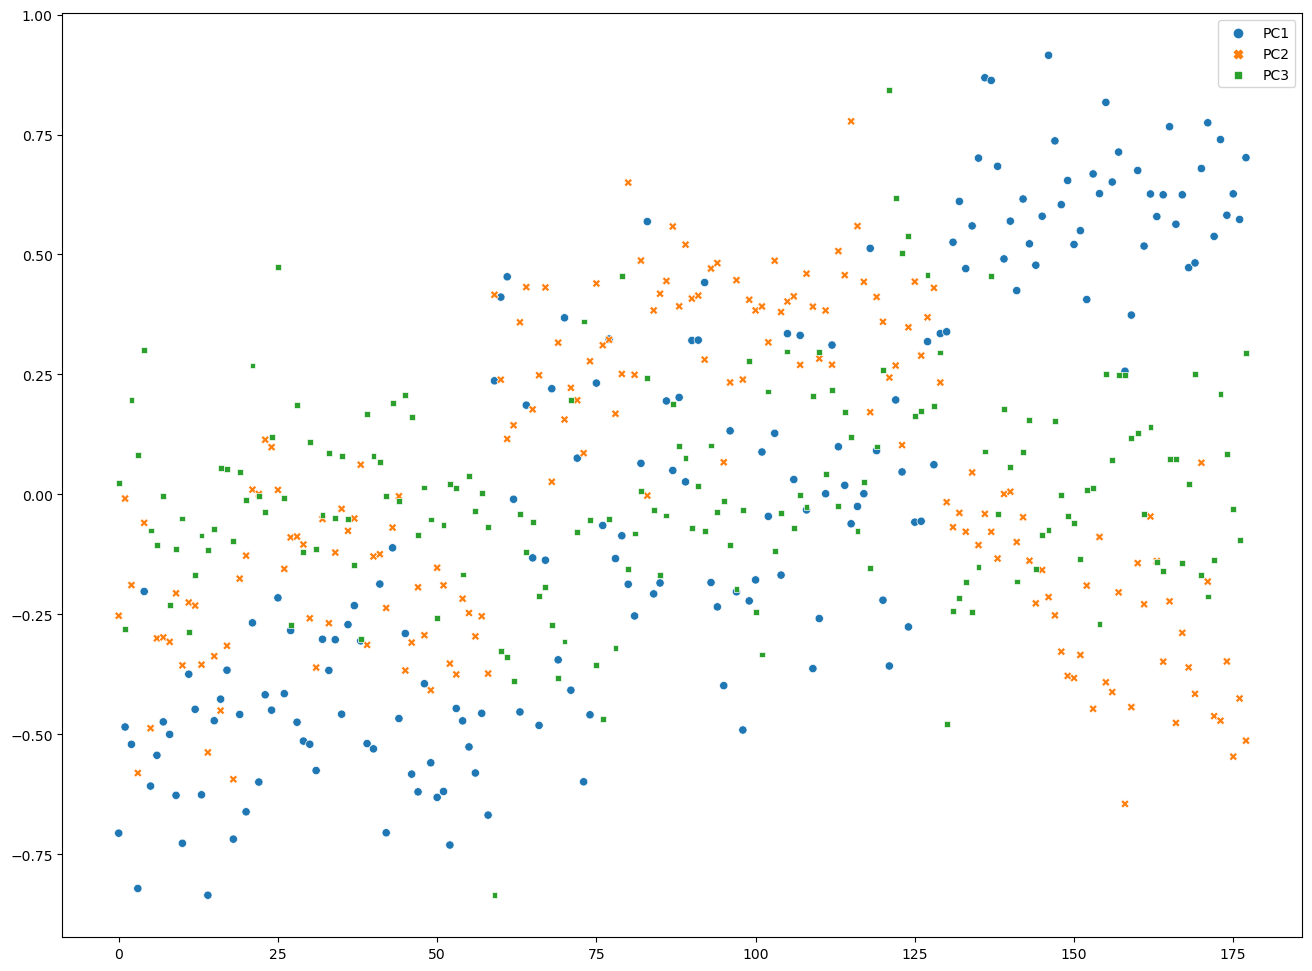

In [226]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=pca_normdf)
plt.show()

# K-Means Clustering

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [175]:
#for standardized dataset pca_stddf

wcss1 = []
s_score1 = []


for i in range(2,11):
    kmeans1 = KMeans(n_clusters=i, random_state=0)
    kmeans1.fit(pca_stddf)
    wcss1.append(kmeans1.inertia_)
    if i==0:
        continue
    s_score1.append(silhouette_score(pca_stddf,kmeans1.labels_))

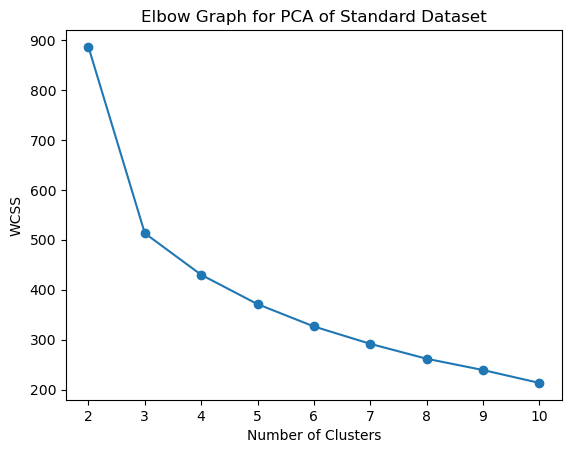

In [176]:
#plotting Elbow Graph
plt.plot(range(2,11), wcss1)
plt.scatter(range(2,11),wcss1)
plt.title('Elbow Graph for PCA of Standard Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

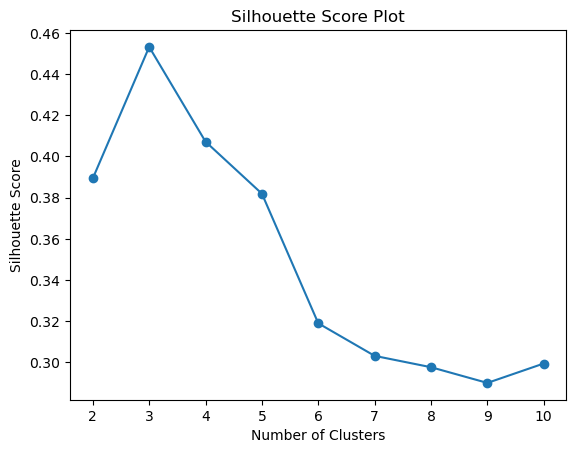

In [177]:
#Plotting Silhouette Score
plt.plot(range(2,11),s_score1)
plt.scatter(range(2,11),s_score1)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [178]:
s_score1

[0.3893881308900331,
 0.45323512156839507,
 0.4071965994633164,
 0.38192649488126307,
 0.31894967105962974,
 0.30312717397160294,
 0.2976152819938032,
 0.28998198250936885,
 0.2994144610369794]

From both of the graphs (Elbow and Silhouette Graphs) we can see that 3 number of clusters is appropriate for number of clusters for PCA of Standard dataset. 

In elbow graph their is no significant decrease after 3 number of clusters. 

In Silhouette Score plot also number 3 has highest score.

# Building KMeans algorithm having 3 Clusters with PCA of Standard Dataset

In [179]:
#Building KMeans Algorithm
Cluster1 = KMeans(3, random_state = 0)
Cluster1.fit(pca_stddf)

KMeans(n_clusters=3, random_state=0)

In [180]:
Cluster1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [181]:
#adding clusters to original dataset
kalgos = data.copy()
kalgos['Clusters'] = Cluster1.labels_
kalgos

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Clusters  
0             0.28             2.29   5.64  1.04      3.92     1065         2  
1             0.26             1.28   4.38  1.05      3.40     1050         2  
2             0.30             2.81   5.68  1.03      3.17     1185         2  
3             0.24             2.18   7.80  0.86      3.45     1480         2  
4             0.39             1.82   4.32  1.04      2.93      735         2  
..             ...              ...    ...   ...       ...      ...       ...  
173           0.52             1.06   7.70  0.64      1.74      740         0  
174           0.43             1.41   7.30  0.70      1.56      750         0  
175           0.43             1.35  10.20  0.59      1.56      835         0  
176           0.53             1.46   9.30  0.60      1.62      840         0  
177           0.56             1.35   9.20  0.61      1.60      560         0  

[178 rows x 14 columns]

In [182]:
#Renaming Clusters
kalgos['Clusters'] = kalgos['Clusters'].replace(0,'Cluster 1')
kalgos['Clusters'] = kalgos['Clusters'].replace(1,'Cluster 2')
kalgos['Clusters'] = kalgos['Clusters'].replace(2,'Cluster 3')
kalgos

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   Clusters  
0             0.28             2.29   5.64  1.04      3.92     1065  Cluster 3  
1             0.26             1.28   4.38  1.05      3.40     1050  Cluster 3  
2             0.30             2.81   5.68  1.03      3.17     1185  Cluster 3  
3             0.24             2.18   7.80  0.86      3.45     1480  Cluster 3  
4             0.39             1.82   4.32  1.04      2.93      735  Cluster 3  
..             ...              ...    ...   ...       ...      ...        ...  
173           0.52             1.06   7.70  0.64      1.74      740  Cluster 1  
174           0.43             1.41   7.30  0.70      1.56      750  Cluster 1  
175           0.43             1.35  10.20  0.59      1.56      835  Cluster 1  
176           0.53             1.46   9.30  0.60      1.62      840  Cluster 1  
177           0.56             1.35   9.20  0.61      1.60      560  Cluster 1  

[178 rows x 14 columns]

In [183]:
#Centroids of each clusters
Cluster1.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03]])

In [184]:
kalgos.groupby('Clusters').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                mean      mean      mean       mean        mean      mean   
Clusters                                                                    
Cluster 1  13.134118  3.307255  2.417647  21.241176   98.666667  1.683922   
Cluster 2  12.249062  1.910313  2.233281  20.087500   92.812500  2.227813   
Cluster 3  13.656032  1.983175  2.460476  17.479365  107.650794  2.858254   

          Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                mean          mean            mean      mean      mean   
Clusters                                                                 
Cluster 1   0.818824      0.451961        1.145882  7.234706  0.691961   
Cluster 2   2.023438      0.359531        1.619063  2.949219  1.063063   
Cluster 3   3.015079      0.291270        1.922540  5.438413  1.065079   

           Dilution      Proline  
               mean         mean  
Clusters                          
Cluster 1  1.696667   619.058824  
Cluster 2  2.803906   507.828125  
Cluster 3  3.157143  1093.238095

In [185]:
kalgos['Clusters'].value_counts()

Cluster 2    64
Cluster 3    63
Cluster 1    51
Name: Clusters, dtype: int64

If we observe the clusters are mainly differentiated by Flavanoids, Color, Dilution and Proline

In [186]:
#Kmeans Algorithm for normalized dataset pca_normdf

wcss2 = []
s_score2 = []

for i in range(2,11):
    kmeans2 = KMeans(n_clusters=i, random_state=0)
    kmeans2.fit(pca_normdf)
    wcss2.append(kmeans2.inertia_)
    if i == 0:
        continue
    s_score2.append(silhouette_score(pca_normdf, kmeans2.labels_))

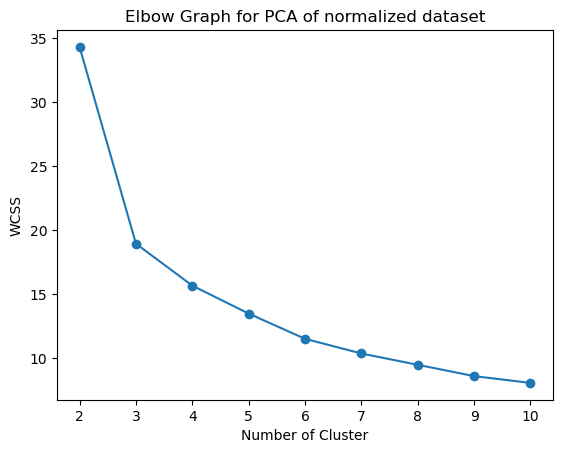

In [187]:
#Plotting Elbow Graph
plt.plot(range(2,11), wcss2)
plt.scatter(range(2,11),wcss2)
plt.title('Elbow Graph for PCA of normalized dataset')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

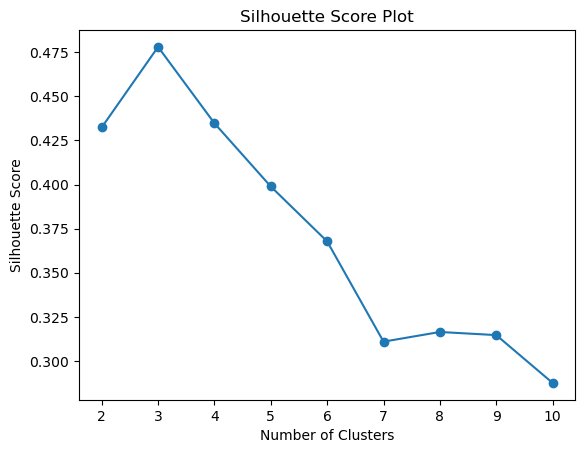

In [188]:
#Plotting Silhouette Score
plt.plot(range(2,11), s_score2)
plt.scatter(range(2,11), s_score2)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [189]:
s_score2

[0.4323518936290522,
 0.4779662656834764,
 0.4347348309376316,
 0.398882189314783,
 0.3677749706015001,
 0.31096929061387474,
 0.31644826278441895,
 0.31467857033538443,
 0.28758330553462946]

We can see the same pattern as in PCA of Standard Dataset here as well. So the number of Cluster is 3. Here Silhouetter Score is higher than in Standard.

# Building KMeans algorithm model of 3 Clusters with PCA of Normalized Dataset 

In [190]:
Cluster2 = KMeans(3, random_state=0)
Cluster2.fit(pca_normdf)

KMeans(n_clusters=3, random_state=0)

In [191]:
Cluster2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [192]:
#Cluster Centers for every cluster
Cluster2.cluster_centers_

array([[ 0.59750634, -0.21895939, -0.01057291],
       [ 0.01701227,  0.36612572,  0.01352436],
       [-0.48503975, -0.17742871, -0.0046045 ]])

In [193]:
#adding clusters to the original dataset
kalgon = data.copy()
kalgon['Cluster'] = Cluster2.labels_
kalgon

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  
0             0.28             2.29   5.64  1.04      3.92     1065        2  
1             0.26             1.28   4.38  1.05      3.40     1050        2  
2             0.30             2.81   5.68  1.03      3.17     1185        2  
3             0.24             2.18   7.80  0.86      3.45     1480        2  
4             0.39             1.82   4.32  1.04      2.93      735        2  
..             ...              ...    ...   ...       ...      ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740        0  
174           0.43             1.41   7.30  0.70      1.56      750        0  
175           0.43             1.35  10.20  0.59      1.56      835        0  
176           0.53             1.46   9.30  0.60      1.62      840        0  
177           0.56             1.35   9.20  0.61      1.60      560        0  

[178 rows x 14 columns]

In [194]:
#renaming the clusters
kalgon['Cluster'] = kalgon['Cluster'].replace(0,'Cluster 1')
kalgon['Cluster'] = kalgon['Cluster'].replace(1,'Cluster 2')
kalgon['Cluster'] = kalgon['Cluster'].replace(2,'Cluster 3')
kalgon.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline    Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065  Cluster 3  
1           0.26             1.28   4.38  1.05      3.40     1050  Cluster 3  
2           0.30             2.81   5.68  1.03      3.17     1185  Cluster 3  
3           0.24             2.18   7.80  0.86      3.45     1480  Cluster 3  
4           0.39             1.82   4.32  1.04      2.93      735  Cluster 3

In [195]:
kalgon.groupby('Cluster').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                mean      mean      mean       mean        mean      mean   
Cluster                                                                     
Cluster 1  13.134118  3.307255  2.417647  21.241176   98.666667  1.683922   
Cluster 2  12.202742  1.946774  2.249839  20.211290   93.451613  2.200806   
Cluster 3  13.656923  1.946154  2.437692  17.441538  106.584615  2.864615   

          Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                mean          mean            mean      mean      mean   
Cluster                                                                  
Cluster 1   0.818824      0.451961        1.145882  7.234706  0.691961   
Cluster 2   2.038710      0.369032        1.607903  2.949355  1.056387   
Cluster 3   2.970000      0.284308        1.923846  5.361692  1.071385   

           Dilution      Proline  
               mean         mean  
Cluster                           
Cluster 1  1.696667   619.058824  
Cluster 2  2.801129   502.709677  
Cluster 3  3.148923  1080.107692

In [196]:
kalgon['Cluster'].value_counts()

Cluster 3    65
Cluster 2    62
Cluster 1    51
Name: Cluster, dtype: int64

# Conclusion

According to KMeans their are 3 Clusters present in the Dataset which follows with the Type Columns containing clusters initially in the original Dataset.

# Hierarchical Clustering

In [197]:
import scipy.cluster.hierarchy as sch  #to draw Dendrogram
from sklearn.cluster import AgglomerativeClustering  #for model building

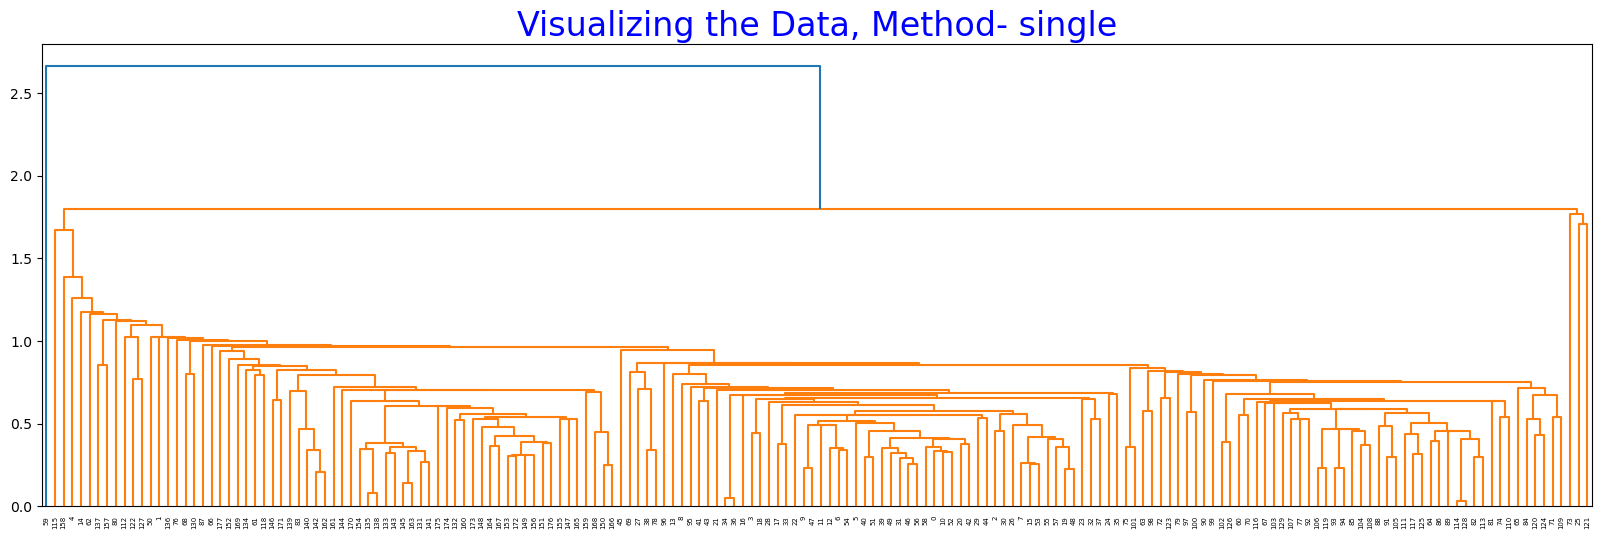

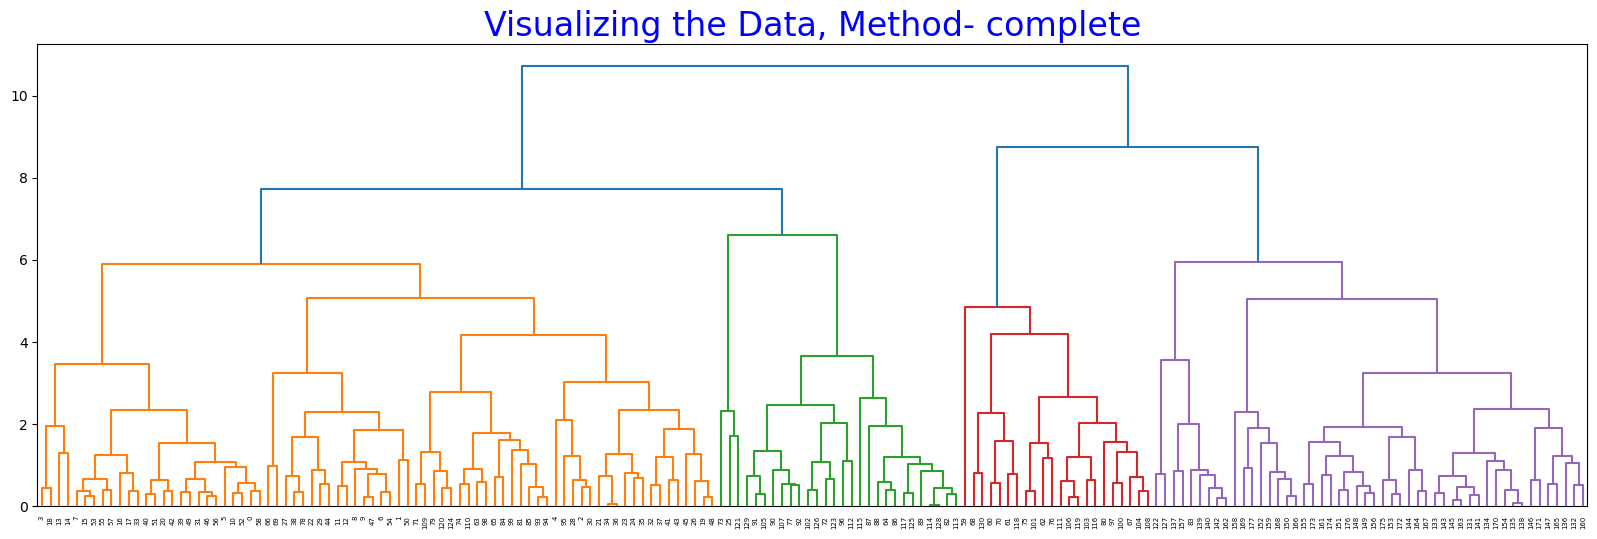

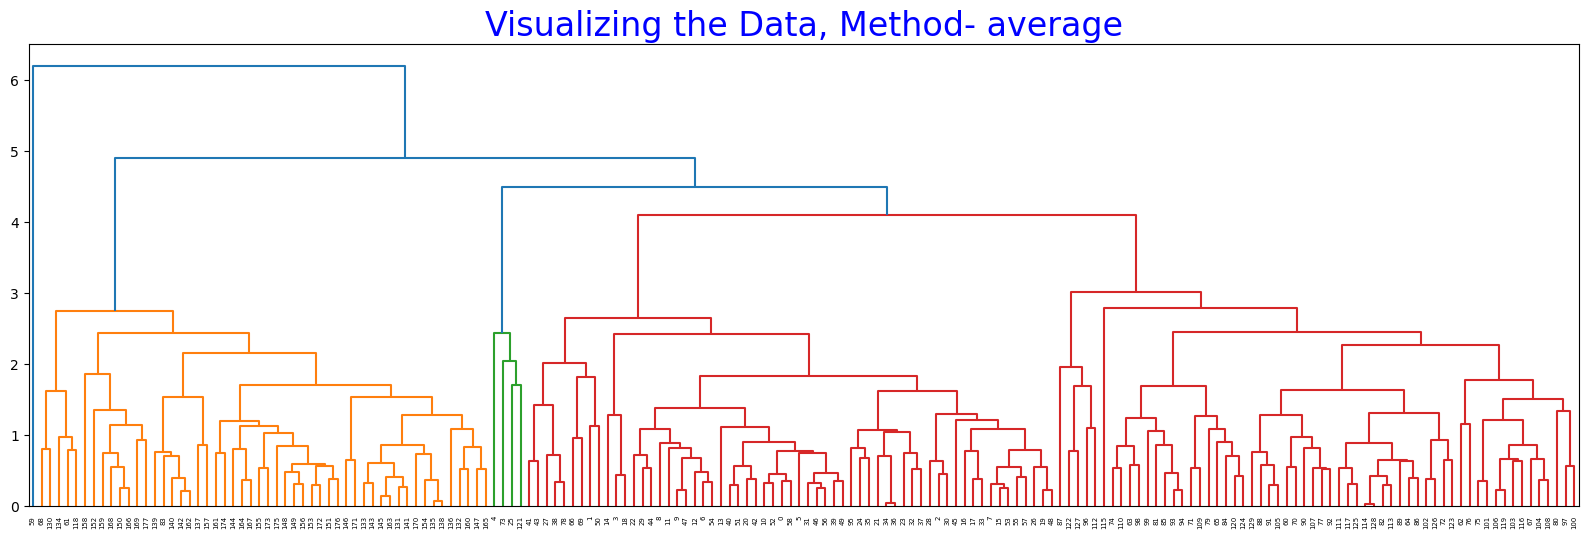

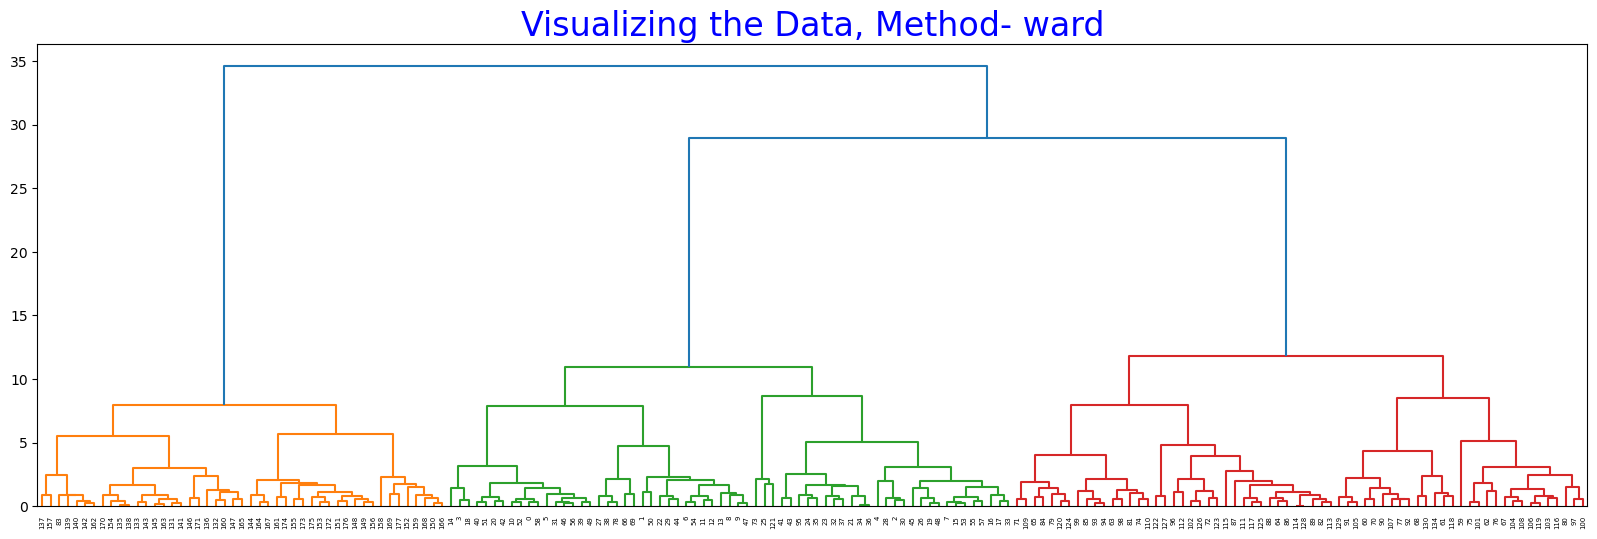

In [198]:
#for PCA of Standard Dataset pca_stddf

for methods in ['single', 'complete', 'average', 'ward']:
    plt.figure(figsize=(20,6))
    
    dict = {'fontsize':24, 'fontweight':16, 'color':'blue'}
    
    plt.title("Visualizing the Data, Method- {}".format(methods), fontdict=dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_stddf, method=methods, optimal_ordering=False))
    plt.show()

From the above dendrograms we can understand that Ward method is more useful than other methods. Let us see what Silhouette Score has to say about it.

In [199]:
n_clus = [2,3,4,5,6,7,8,9,10]

for n_clus in n_clus:
    for linkage in ['single', 'complete', 'average', 'ward']:
        hie_clus1 = AgglomerativeClustering(n_clusters=n_clus, linkage=linkage)
        hie_label1 = hie_clus1.fit_predict(pca_stddf)
        sil_score1 = silhouette_score(pca_stddf, hie_label1)
        print("In PCA with Standard Dataset for n_clus = ", n_clus,"with Linkage method = ", linkage,"The Silhouette Score is ",
             sil_score1)
    print()

In PCA with Standard Dataset for n_clus =  2 with Linkage method =  single The Silhouette Score is  0.3631067305104142
In PCA with Standard Dataset for n_clus =  2 with Linkage method =  complete The Silhouette Score is  0.32546865442450873
In PCA with Standard Dataset for n_clus =  2 with Linkage method =  average The Silhouette Score is  0.3631067305104142
In PCA with Standard Dataset for n_clus =  2 with Linkage method =  ward The Silhouette Score is  0.395090372250754

In PCA with Standard Dataset for n_clus =  3 with Linkage method =  single The Silhouette Score is  0.2166287164412579
In PCA with Standard Dataset for n_clus =  3 with Linkage method =  complete The Silhouette Score is  0.28750089351606367
In PCA with Standard Dataset for n_clus =  3 with Linkage method =  average The Silhouette Score is  0.38672545200747743
In PCA with Standard Dataset for n_clus =  3 with Linkage method =  ward The Silhouette Score is  0.44594921980629687

In PCA with Standard Dataset for n_clus =

Silhouette Score says the same, with highest score of 0.30874273928315915, we will go ahead with 3 clusters and Ward Linkage method.

# Performing Hierarchical Clustering with 3 Clusters and ward Linkage method for PCA of Standard Dataset

In [200]:
hclus1 = AgglomerativeClustering(3, linkage='ward')
hclus1

AgglomerativeClustering(n_clusters=3)

In [201]:
hlabel1 = hclus1.fit_predict(pca_stddf)
hlabel1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [202]:
#Assigning labels to original dataset
halgos = data.copy()
halgos['Cluster'] = hlabel1
halgos.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        2  
1           0.26             1.28   4.38  1.05      3.40     1050        2  
2           0.30             2.81   5.68  1.03      3.17     1185        2  
3           0.24             2.18   7.80  0.86      3.45     1480        2  
4           0.39             1.82   4.32  1.04      2.93      735        2

In [203]:
#renaming clusters
halgos['Cluster'] = halgos['Cluster'].replace(0,'Cluster 1')
halgos['Cluster'] = halgos['Cluster'].replace(1,'Cluster 2')
halgos['Cluster'] = halgos['Cluster'].replace(2,'Cluster 3')
halgos.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline    Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065  Cluster 3  
1           0.26             1.28   4.38  1.05      3.40     1050  Cluster 3  
2           0.30             2.81   5.68  1.03      3.17     1185  Cluster 3  
3           0.24             2.18   7.80  0.86      3.45     1480  Cluster 3  
4           0.39             1.82   4.32  1.04      2.93      735  Cluster 3

In [204]:
halgos.groupby('Cluster').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                mean      mean      mean       mean        mean      mean   
Cluster                                                                     
Cluster 1  12.264242  1.932121  2.245455  20.087879   91.666667  2.220152   
Cluster 2  13.171489  3.431702  2.441064  21.595745   98.829787  1.674894   
Cluster 3  13.624769  1.954769  2.435538  17.373846  108.600000  2.819692   

          Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                mean          mean            mean      mean      mean   
Cluster                                                                  
Cluster 1   1.991364      0.367727        1.540455  3.036364  1.042515   
Cluster 2   0.792979      0.452766        1.165957  7.452553  0.682979   
Cluster 3   2.961692      0.290154        1.949385  5.379538  1.069538   

           Dilution      Proline  
               mean         mean  
Cluster                           
Cluster 1  2.729848   504.439394  
Cluster 2  1.702553   627.021277  
Cluster 3  3.149077  1079.753846

In [205]:
halgos['Cluster'].value_counts()

Cluster 1    66
Cluster 3    65
Cluster 2    47
Name: Cluster, dtype: int64

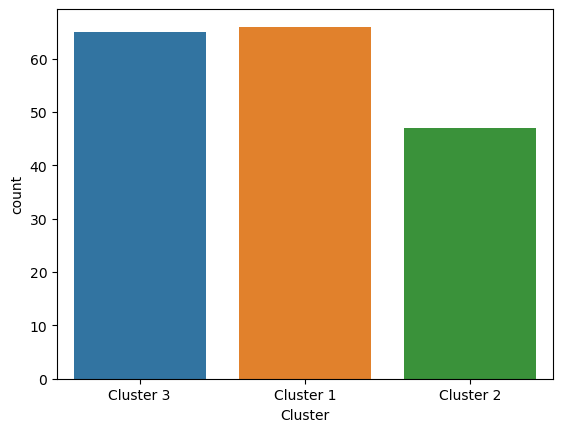

In [206]:
sns.countplot(x = halgos['Cluster'])
plt.show()

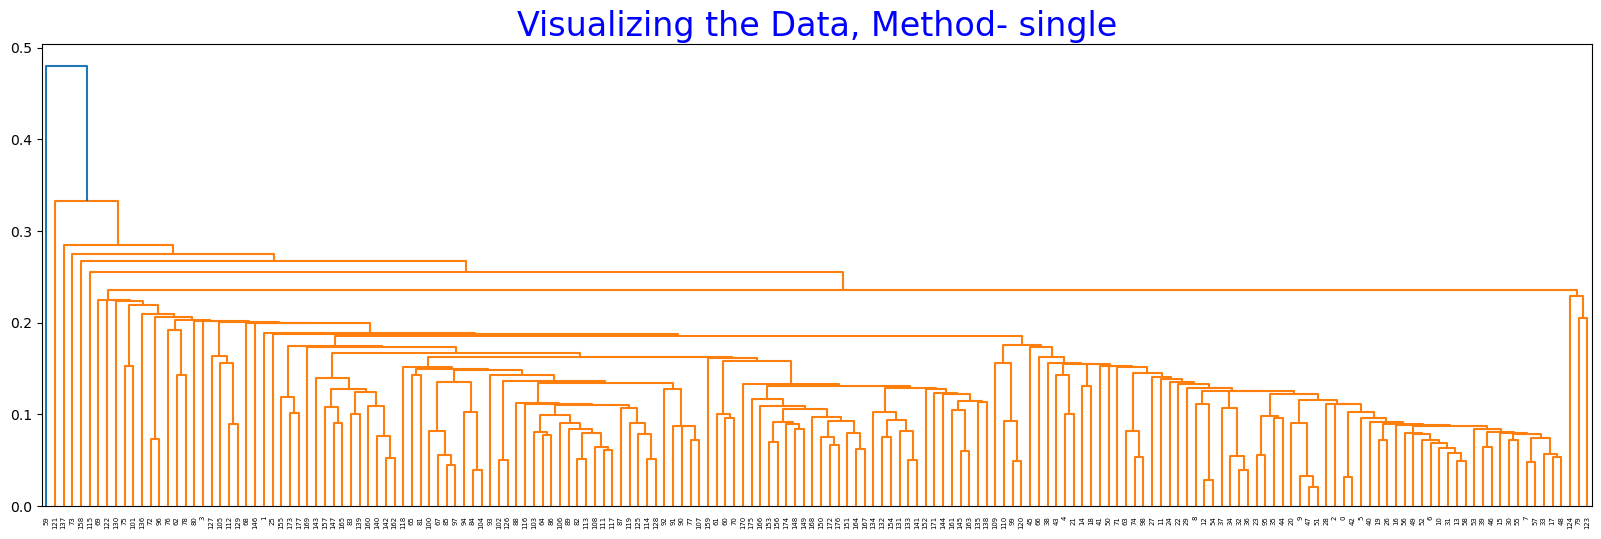

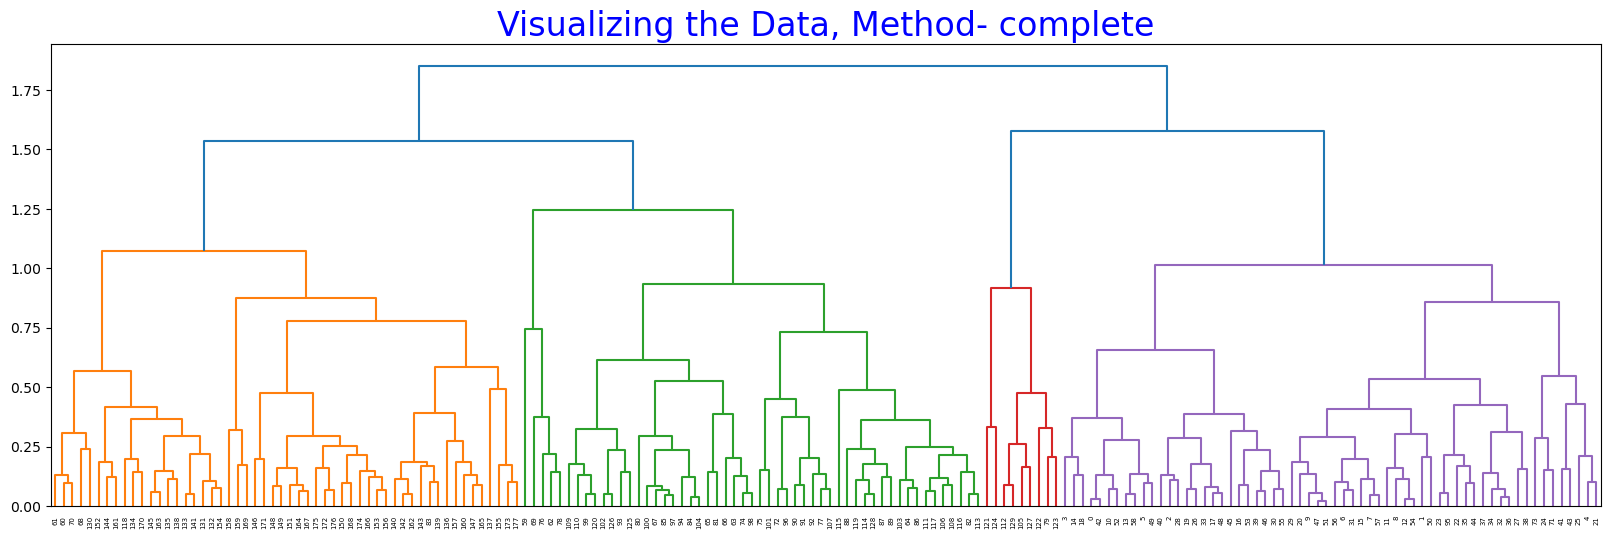

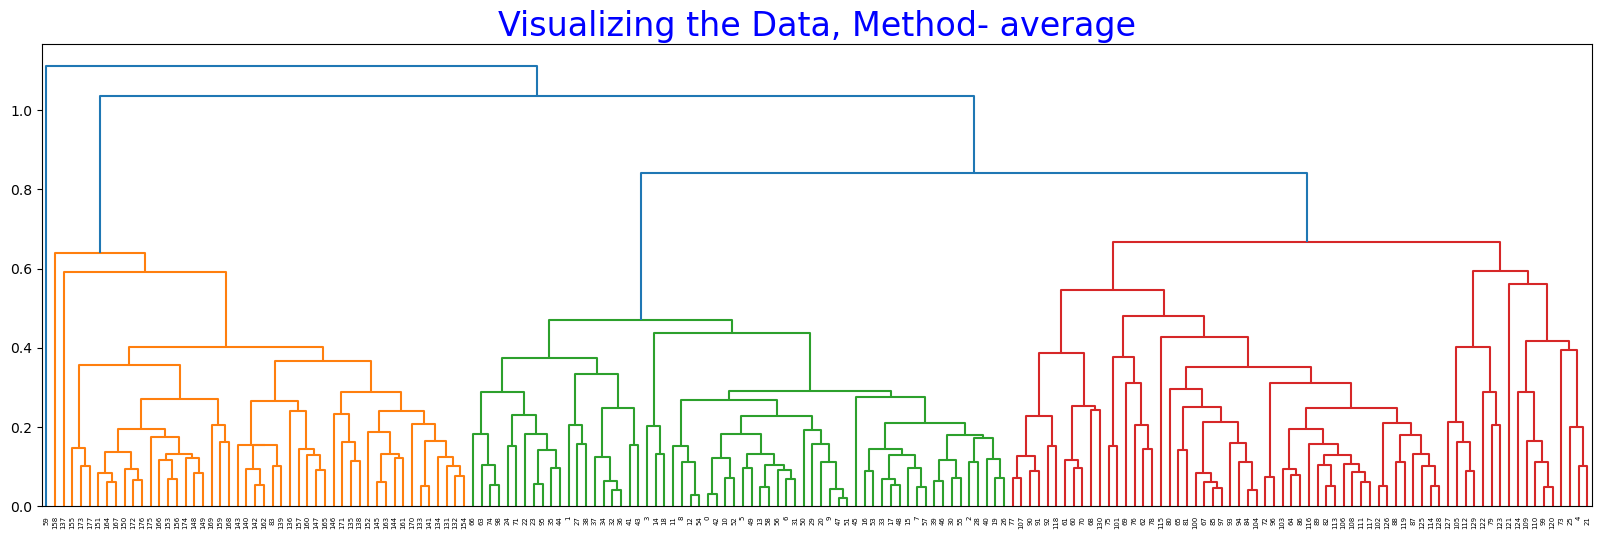

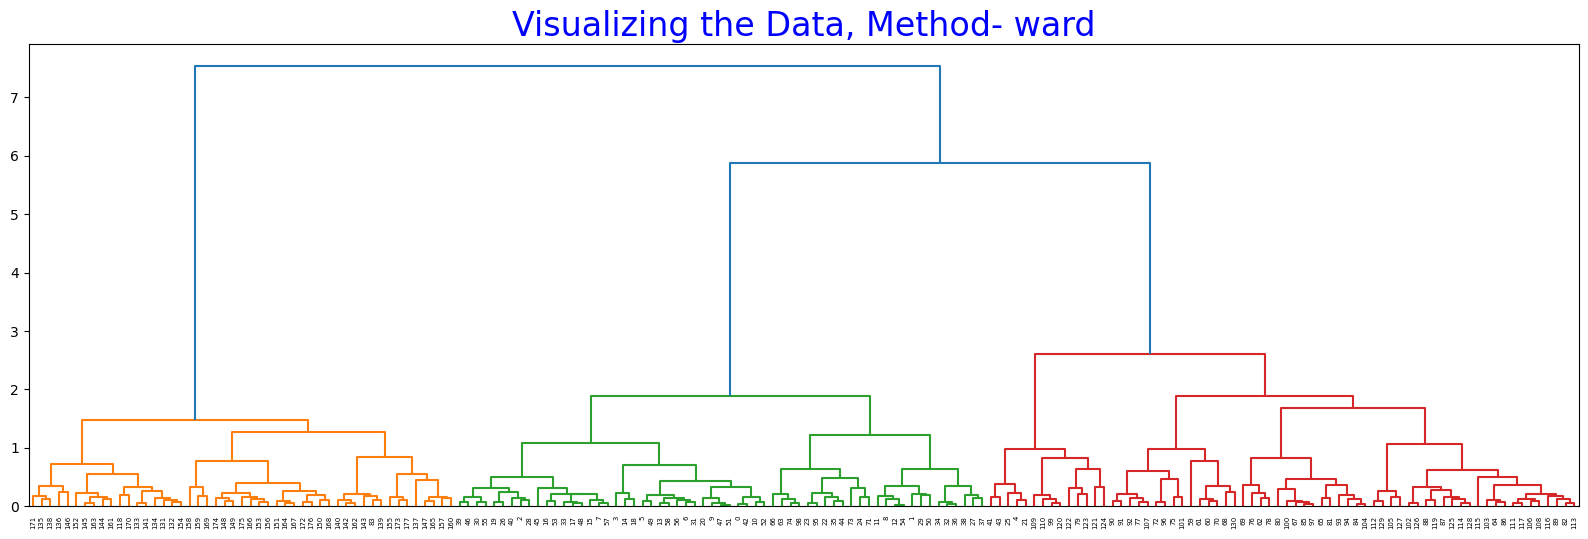

In [207]:
#for PCA with Normalized Dataset

for methods in ['single','complete','average','ward']:
    plt.figure(figsize=(20,6))
    
    plt.title("Visualizing the Data, Method- {}".format(methods), fontdict=dict)
    Dendrogram2 = sch.dendrogram(sch.linkage(pca_normdf, method= methods, optimal_ordering=False))
    plt.show()

In [208]:
n_clus = [2,3,4,5,6,7,8,9,10]

for n_clus in n_clus:
    for linkage in ['single', 'complete', 'average', 'ward']:
        hie_clus2 = AgglomerativeClustering(n_clusters=n_clus, linkage=linkage)
        hie_label2 = hie_clus2.fit_predict(pca_normdf)
        sil_score2 = silhouette_score(pca_normdf, hie_label2)
        print("In PCA with Normalized Dataset for n_clus = ", n_clus,"with Linkage method = ", linkage,"The Silhouette Score is ",
             sil_score2)
    print()

In PCA with Normalized Dataset for n_clus =  2 with Linkage method =  single The Silhouette Score is  0.2657130305012294
In PCA with Normalized Dataset for n_clus =  2 with Linkage method =  complete The Silhouette Score is  0.3385358273079748
In PCA with Normalized Dataset for n_clus =  2 with Linkage method =  average The Silhouette Score is  0.2657130305012294
In PCA with Normalized Dataset for n_clus =  2 with Linkage method =  ward The Silhouette Score is  0.42761758661440247

In PCA with Normalized Dataset for n_clus =  3 with Linkage method =  single The Silhouette Score is  0.14206633532594284
In PCA with Normalized Dataset for n_clus =  3 with Linkage method =  complete The Silhouette Score is  0.28006015896583886
In PCA with Normalized Dataset for n_clus =  3 with Linkage method =  average The Silhouette Score is  0.3905447482849226
In PCA with Normalized Dataset for n_clus =  3 with Linkage method =  ward The Silhouette Score is  0.45962817084998875

In PCA with Normalized D

# Performing Hierarchical Clustering with 3 Clusters and ward Linkage method for PCA of Normalized Dataset

In [209]:
hclus2 = AgglomerativeClustering(3, linkage='ward')
hclus2

AgglomerativeClustering(n_clusters=3)

In [210]:
hlabel2 = hclus2.fit_predict(pca_normdf)
hlabel2

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [211]:
#Assigning labels to original dataset
halgon = data.copy()
halgon['Cluster'] = hlabel2
halgon.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        2  
1           0.26             1.28   4.38  1.05      3.40     1050        2  
2           0.30             2.81   5.68  1.03      3.17     1185        2  
3           0.24             2.18   7.80  0.86      3.45     1480        2  
4           0.39             1.82   4.32  1.04      2.93      735        0

In [212]:
#renaming clusters
halgon['Cluster'] = halgon['Cluster'].replace(0,'Cluster 1')
halgon['Cluster'] = halgon['Cluster'].replace(1,'Cluster 2')
halgon['Cluster'] = halgon['Cluster'].replace(2,'Cluster 3')
halgon.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline    Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065  Cluster 3  
1           0.26             1.28   4.38  1.05      3.40     1050  Cluster 3  
2           0.30             2.81   5.68  1.03      3.17     1185  Cluster 3  
3           0.24             2.18   7.80  0.86      3.45     1480  Cluster 3  
4           0.39             1.82   4.32  1.04      2.93      735  Cluster 1

In [213]:
halgos.groupby('Cluster').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                mean      mean      mean       mean        mean      mean   
Cluster                                                                     
Cluster 1  12.264242  1.932121  2.245455  20.087879   91.666667  2.220152   
Cluster 2  13.171489  3.431702  2.441064  21.595745   98.829787  1.674894   
Cluster 3  13.624769  1.954769  2.435538  17.373846  108.600000  2.819692   

          Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                mean          mean            mean      mean      mean   
Cluster                                                                  
Cluster 1   1.991364      0.367727        1.540455  3.036364  1.042515   
Cluster 2   0.792979      0.452766        1.165957  7.452553  0.682979   
Cluster 3   2.961692      0.290154        1.949385  5.379538  1.069538   

           Dilution      Proline  
               mean         mean  
Cluster                           
Cluster 1  2.729848   504.439394  
Cluster 2  1.702553   627.021277  
Cluster 3  3.149077  1079.753846

In [214]:
halgos['Cluster'].value_counts()

Cluster 1    66
Cluster 3    65
Cluster 2    47
Name: Cluster, dtype: int64

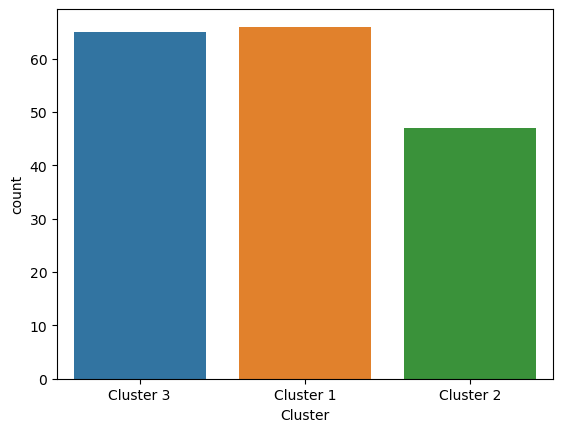

In [215]:
sns.countplot(x = halgos['Cluster'])
plt.show()

# Conclusion

In Hierarchical Clustering as well we have 3 clusters and both are with ward method.

So, keeping in mind all the Clustering algorithms performed, we got 3 clusters.

In [232]:
wine['Type'].unique()

array([1, 2, 3], dtype=int64)

Here as well we have 3 clusters.

We got same number of clusters using Clustering Algorithm.